In [1]:
#import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import  accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#import all the 5 datasets
data = pd.read_csv("D:\\project\\dataset.csv")
data1 = pd.read_csv("D:\\project\\Symptom-severity.csv")
data2 = pd.read_csv("D:\\project\\symptom_Description.csv")
data3 = pd.read_csv("D:\\project\\symptom_precaution.csv")
data4 = pd.read_csv("D:\\project\\disease-doctor_type.csv")

In [3]:
#dispaly the dataset
data

Disease             Symptom_1  \
0                            Fungal infection               itching   
1                            Fungal infection             skin_rash   
2                            Fungal infection               itching   
3                            Fungal infection               itching   
4                            Fungal infection               itching   
...                                       ...                   ...   
4915  (vertigo) Paroymsal  Positional Vertigo              vomiting   
4916                                     Acne             skin_rash   
4917                  Urinary tract infection   burning_micturition   
4918                                Psoriasis             skin_rash   
4919                                 Impetigo             skin_rash   

                  Symptom_2              Symptom_3                  Symptom_4  \
0                 skin_rash   nodal_skin_eruptions        dischromic _patches   
1      nodal_skin_eruptions    dischromic _patches                        NaN   
2      nodal_skin_eruptions    dischromic _patches                        NaN   
3                 skin_rash    dischromic _patches                        NaN   
4                 skin_rash   nodal_skin_eruptions                        NaN   
...                     ...                    ...                        ...   
4915               headache                 nausea         spinning_movements   
4916     pus_filled_pimples             blackheads                   scurring   
4917     bladder_discomfort    foul_smell_of urine   continuous_feel_of_urine   
4918             joint_pain           skin_peeling        silver_like_dusting   
4919             high_fever                blister       red_sore_around_nose   

                  Symptom_5            Symptom_6 Symptom_7 Symptom_8  \
0                       NaN                  NaN       NaN       NaN   
1                       NaN                  NaN       NaN       NaN   
2                       NaN                  NaN       NaN       NaN   
3                       NaN                  NaN       NaN       NaN   
4                       NaN                  NaN       NaN       NaN   
...                     ...                  ...       ...       ...   
4915        loss_of_balance         unsteadiness       NaN       NaN   
4916                    NaN                  NaN       NaN       NaN   
4917                    NaN                  NaN       NaN       NaN   
4918   small_dents_in_nails   inflammatory_nails       NaN       NaN   
4919      yellow_crust_ooze                  NaN       NaN       NaN   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
...        ...        ...        ...        ...        ...        ...   
4915       NaN        NaN        NaN        NaN        NaN        NaN   
4916       NaN        NaN        NaN        NaN        NaN        NaN   
4917       NaN        NaN        NaN        NaN        NaN        NaN   
4918       NaN        NaN        NaN        NaN        NaN        NaN   
4919       NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_15 Symptom_16 Symptom_17  
0           NaN        NaN        NaN  
1           NaN        NaN        NaN  
2           NaN        NaN        NaN  
3           NaN        NaN        NaN  
4           NaN        NaN        NaN  
...         ...        ...        ...  
4915        NaN        NaN        NaN  
4916        NaN        NaN        NaN  
4917        NaN        NaN        NaN  
4918        NaN        NaN        NaN  
4919        NaN        NaN    

# Exploratory data analysis
EDA is applied to investigate the data and summarize the key insights.

In [4]:
#Description of the base dataset
data.describe()

Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  \
count               4920       4920       4920      4920         4572   
unique                41         34         48        54           50   
top     Fungal infection   vomiting   vomiting   fatigue   high_fever   
freq                 120        822        870       726          378   

        Symptom_5 Symptom_6        Symptom_7        Symptom_8  \
count        3714      2934             2268             1944   
unique         38        32               26               21   
top      headache    nausea   abdominal_pain   abdominal_pain   
freq          348       390              264              276   

                 Symptom_9          Symptom_10     Symptom_11 Symptom_12  \
count                 1692                1512           1194        744   
unique                  22                  21             18         11   
top      yellowing_of_eyes   yellowing_of_eyes   irritability    malaise   
freq                   228                 198            120        126   

          Symptom_13   Symptom_14   Symptom_15        Symptom_16    Symptom_17  
count            504          306          240               192            72  
unique             8            4            3                 3             1  
top      muscle_pain   chest_pain   chest_pain   blood_in_sputum   muscle_pain  
freq              72           96          144                72            72

In [5]:
#Find out the number of rows and columns of the dataset
data.shape

(4920, 18)

In [6]:
#Details of each column and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


1.Dataset contains 17 Symptom columns of type object and one disease column
2.Syptom 4 to symptom 17 columns contains missing values

In [7]:
#Disease column contains 41 unique values
data['Disease'].nunique()

41

In [8]:
#unique values of disease 
data['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [9]:
#unique values of Symptom_1
data['Symptom_1'].unique()

array(['itching', ' skin_rash', ' continuous_sneezing', ' shivering',
       ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting', ' patches_in_throat', ' fatigue',
       ' weight_loss', ' sunken_eyes', ' cough', ' headache',
       ' chest_pain', ' back_pain', ' weakness_in_limbs', ' chills',
       ' joint_pain', ' yellowish_skin', ' constipation',
       ' pain_during_bowel_movements', ' breathlessness', ' cramps',
       ' weight_gain', ' mood_swings', ' neck_pain', ' muscle_weakness',
       ' stiff_neck', ' pus_filled_pimples', ' burning_micturition',
       ' bladder_discomfort', ' high_fever'], dtype=object)

In [10]:
#number of unique values of Symptom_1
data['Symptom_1'].nunique()

34

In [11]:
#unique values of Symptom_2
data['Symptom_2'].unique()

array([' skin_rash', ' nodal_skin_eruptions', ' shivering', ' chills',
       ' acidity', ' ulcers_on_tongue', ' vomiting', ' yellowish_skin',
       ' stomach_pain', ' loss_of_appetite', ' indigestion',
       ' patches_in_throat', ' high_fever', ' weight_loss',
       ' restlessness', ' sunken_eyes', ' dehydration', ' cough',
       ' chest_pain', ' dizziness', ' headache', ' weakness_in_limbs',
       ' neck_pain', ' weakness_of_one_body_side', ' fatigue',
       ' joint_pain', ' lethargy', ' nausea', ' abdominal_pain',
       ' pain_during_bowel_movements', ' pain_in_anal_region',
       ' breathlessness', ' sweating', ' cramps', ' bruising',
       ' weight_gain', ' cold_hands_and_feets', ' mood_swings',
       ' anxiety', ' knee_pain', ' stiff_neck', ' swelling_joints',
       ' pus_filled_pimples', ' blackheads', ' bladder_discomfort',
       ' foul_smell_of urine', ' skin_peeling', ' blister'], dtype=object)

In [12]:
#number of unique values of Symptom_2
data['Symptom_2'].nunique()

48

In [13]:
#unique values of Symptom_3
data['Symptom_3'].unique()

array([' nodal_skin_eruptions', ' dischromic _patches', ' chills',
       ' watering_from_eyes', ' ulcers_on_tongue', ' vomiting',
       ' yellowish_skin', ' nausea', ' stomach_pain',
       ' burning_micturition', ' abdominal_pain', ' loss_of_appetite',
       ' high_fever', ' extra_marital_contacts', ' restlessness',
       ' lethargy', ' dehydration', ' diarrhoea', ' breathlessness',
       ' dizziness', ' loss_of_balance', ' headache',
       ' blurred_and_distorted_vision', ' neck_pain',
       ' weakness_of_one_body_side', ' altered_sensorium', ' fatigue',
       ' weight_loss', ' sweating', ' joint_pain', ' dark_urine',
       ' swelling_of_stomach', ' cough', ' pain_in_anal_region',
       ' bloody_stool', ' chest_pain', ' bruising', ' obesity',
       ' cold_hands_and_feets', ' mood_swings', ' anxiety', ' knee_pain',
       ' hip_joint_pain', ' swelling_joints', ' movement_stiffness',
       ' spinning_movements', ' blackheads', ' scurring',
       ' foul_smell_of urine', ' c

In [14]:
#number of unique values of Symptom_3
data['Symptom_3'].nunique()

54

In [15]:
#unique values of Symptom_4
data['Symptom_4'].unique()

array([' dischromic _patches', nan, ' watering_from_eyes', ' vomiting',
       ' cough', ' nausea', ' loss_of_appetite', ' burning_micturition',
       ' spotting_ urination', ' passage_of_gases', ' abdominal_pain',
       ' extra_marital_contacts', ' lethargy', ' irregular_sugar_level',
       ' diarrhoea', ' breathlessness', ' family_history',
       ' loss_of_balance', ' lack_of_concentration',
       ' blurred_and_distorted_vision', ' excessive_hunger', ' dizziness',
       ' altered_sensorium', ' weight_loss', ' high_fever', ' sweating',
       ' headache', ' fatigue', ' dark_urine', ' yellowish_skin',
       ' yellowing_of_eyes', ' swelling_of_stomach',
       ' distention_of_abdomen', ' bloody_stool', ' irritation_in_anus',
       ' chest_pain', ' obesity', ' swollen_legs', ' mood_swings',
       ' restlessness', ' hip_joint_pain', ' swelling_joints',
       ' movement_stiffness', ' painful_walking', ' spinning_movements',
       ' scurring', ' continuous_feel_of_urine', ' silve

In [16]:
#number of unique values of Symptom_4
data['Symptom_4'].nunique()

50

In [17]:
#unique values of Symptom_5
data['Symptom_5'].unique()

array([nan, ' cough', ' chest_pain', ' loss_of_appetite',
       ' abdominal_pain', ' spotting_ urination', ' internal_itching',
       ' passage_of_gases', ' irregular_sugar_level',
       ' blurred_and_distorted_vision', ' family_history',
       ' mucoid_sputum', ' lack_of_concentration', ' excessive_hunger',
       ' stiff_neck', ' loss_of_balance', ' high_fever',
       ' yellowish_skin', ' headache', ' nausea', ' fatigue',
       ' dark_urine', ' yellowing_of_eyes', ' distention_of_abdomen',
       ' history_of_alcohol_consumption', ' breathlessness', ' sweating',
       ' irritation_in_anus', ' swollen_legs', ' swollen_blood_vessels',
       ' lethargy', ' dizziness', ' diarrhoea', ' swelling_joints',
       ' painful_walking', ' unsteadiness', ' small_dents_in_nails',
       ' inflammatory_nails', ' yellow_crust_ooze'], dtype=object)

In [18]:
#number of unique values of Symptom_5
data['Symptom_5'].nunique()

38

In [19]:
#unique values of Symptom_6
data['Symptom_6'].unique()

array([nan, ' chest_pain', ' abdominal_pain', ' yellowing_of_eyes',
       ' internal_itching', ' blurred_and_distorted_vision', ' obesity',
       ' mucoid_sputum', ' stiff_neck', ' depression', ' yellowish_skin',
       ' dark_urine', ' nausea', ' diarrhoea', ' headache',
       ' loss_of_appetite', ' high_fever', ' constipation',
       ' family_history', ' history_of_alcohol_consumption',
       ' fluid_overload', ' breathlessness', ' swelled_lymph_nodes',
       ' sweating', ' malaise', ' swollen_blood_vessels',
       ' prominent_veins_on_calf', ' dizziness', ' puffy_face_and_eyes',
       ' fast_heart_rate', ' painful_walking', ' unsteadiness',
       ' inflammatory_nails'], dtype=object)

In [20]:
#number of unique values of Symptom_6
data['Symptom_6'].nunique()

32

In [21]:
#unique values of Symptom_7
data['Symptom_7'].unique()

array([nan, ' yellowing_of_eyes', ' obesity', ' excessive_hunger',
       ' depression', ' irritability', ' dark_urine', ' abdominal_pain',
       ' muscle_pain', ' diarrhoea', ' loss_of_appetite', ' mild_fever',
       ' headache', ' nausea', ' constipation', ' yellow_urine',
       ' fluid_overload', ' breathlessness', ' sweating',
       ' swelled_lymph_nodes', ' malaise', ' phlegm',
       ' prominent_veins_on_calf', ' puffy_face_and_eyes',
       ' enlarged_thyroid', ' fast_heart_rate',
       ' blurred_and_distorted_vision'], dtype=object)

In [22]:
#unique values of Symptom_8
data['Symptom_8'].unique()

array([nan, ' excessive_hunger', ' increased_appetite', ' irritability',
       ' visual_disturbances', ' abdominal_pain', ' muscle_pain',
       ' mild_fever', ' swelled_lymph_nodes', ' nausea',
       ' loss_of_appetite', ' diarrhoea', ' yellow_urine',
       ' yellowing_of_eyes', ' sweating', ' malaise', ' phlegm',
       ' chest_pain', ' enlarged_thyroid', ' brittle_nails',
       ' muscle_weakness', ' drying_and_tingling_lips'], dtype=object)

In [23]:
#unique values of Symptom_9
data['Symptom_9'].unique()

array([nan, ' increased_appetite', ' polyuria', ' visual_disturbances',
       ' swelled_lymph_nodes', ' malaise', ' loss_of_appetite',
       ' pain_behind_the_eyes', ' toxic_look_(typhos)', ' diarrhoea',
       ' mild_fever', ' yellowing_of_eyes', ' abdominal_pain', ' phlegm',
       ' throat_irritation', ' fast_heart_rate', ' chest_pain',
       ' brittle_nails', ' swollen_extremeties', ' muscle_weakness',
       ' irritability', ' slurred_speech', ' drying_and_tingling_lips'],
      dtype=object)

In [24]:
#Each symptoms counts in each column
s=data.apply(pd.value_counts)

In [25]:
s

Disease  Symptom_1  Symptom_2  Symptom_3  Symptom_4  \
 abdominal_pain              NaN        NaN       12.0      132.0       84.0   
 abnormal_menstruation       NaN        NaN        NaN        NaN        NaN   
 acidity                     NaN      120.0      102.0        NaN        NaN   
 acute_liver_failure         NaN        NaN        NaN        NaN        NaN   
 altered_sensorium           NaN        NaN        NaN       36.0       78.0   
...                          ...        ...        ...        ...        ...   
Typhoid                    120.0        NaN        NaN        NaN        NaN   
Urinary tract infection    120.0        NaN        NaN        NaN        NaN   
Varicose veins             120.0        NaN        NaN        NaN        NaN   
hepatitis A                120.0        NaN        NaN        NaN        NaN   
itching                      NaN      678.0        NaN        NaN        NaN   

                         Symptom_5  Symptom_6  Symptom_7  Symptom_8  \
 abdominal_pain               30.0      156.0      264.0      276.0   
 abnormal_menstruation         NaN        NaN        NaN        NaN   
 acidity                       NaN        NaN        NaN        NaN   
 acute_liver_failure           NaN        NaN        NaN        NaN   
 altered_sensorium             NaN        NaN        NaN        NaN   
...                            ...        ...        ...        ...   
Typhoid                        NaN        NaN        NaN        NaN   
Urinary tract infection        NaN        NaN        NaN        NaN   
Varicose veins                 NaN        NaN        NaN        NaN   
hepatitis A                    NaN        NaN        NaN        NaN   
itching                        NaN        NaN        NaN        NaN   

                         Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
 abdominal_pain               78.0         NaN         NaN         NaN   
 abnormal_menstruation         NaN        48.0        72.0        48.0   
 acidity                       NaN         NaN         NaN         NaN   
 acute_liver_failure           NaN        42.0        72.0         NaN   
 altered_sensorium             NaN         NaN         NaN         NaN   
...                            ...         ...         ...         ...   
Typhoid                        NaN         NaN         NaN         NaN   
Urinary tract infection        NaN         NaN         NaN         NaN   
Varicose veins                 NaN         NaN         NaN         NaN   
hepatitis A                    NaN         NaN         NaN         NaN   
itching                        NaN         NaN         NaN         NaN   

                         Symptom_13  Symptom_14  Symptom_15  Symptom_16  \
 abdominal_pain                 NaN         NaN         NaN         NaN   
 abnormal_menstruation         72.0         NaN         NaN         NaN   
 acidity                        NaN         NaN         NaN         NaN   
 acute_liver_failure            NaN         NaN         NaN         NaN   
 altered_sensorium              NaN         NaN         NaN         NaN   
...                             ...         ...         ...         ...   
Typhoid                         NaN         NaN         NaN         NaN   
Urinary tract infection         NaN         NaN         NaN         NaN   
Varicose veins                  NaN         NaN         NaN         NaN   
hepatitis A                     NaN         NaN         NaN         NaN   
itching                         NaN         NaN         NaN         NaN   

                         Symptom_17  
 abdominal_pain                 NaN  
 abnormal_menstruation          NaN  
 acidity                        NaN  
 acute_liver_failure            NaN  
 altered_sensorium              NaN  
...                             ...  
Typhoid                         NaN  
Urinary tract infection         NaN  
Varicose veins                  NaN  
hepatitis A                     NaN  
itc

# Univaraiate Analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


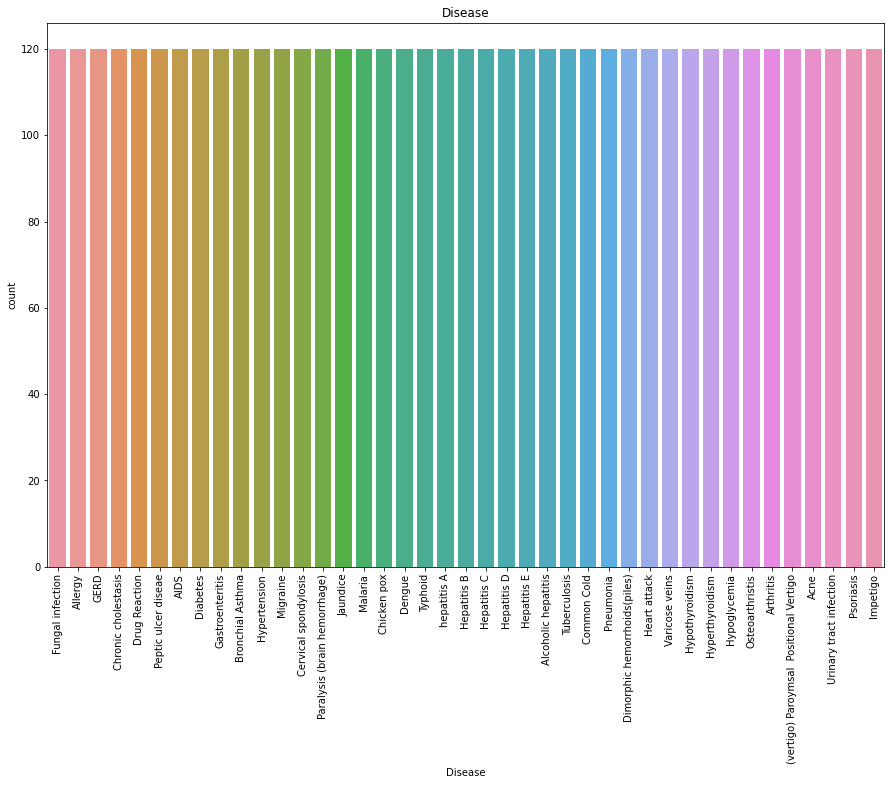

In [168]:
#count of each disease in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
plt.title("Disease")
pr1=sns.countplot(data['Disease']);

In [ ]:
#it contains 120 records of each disease

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


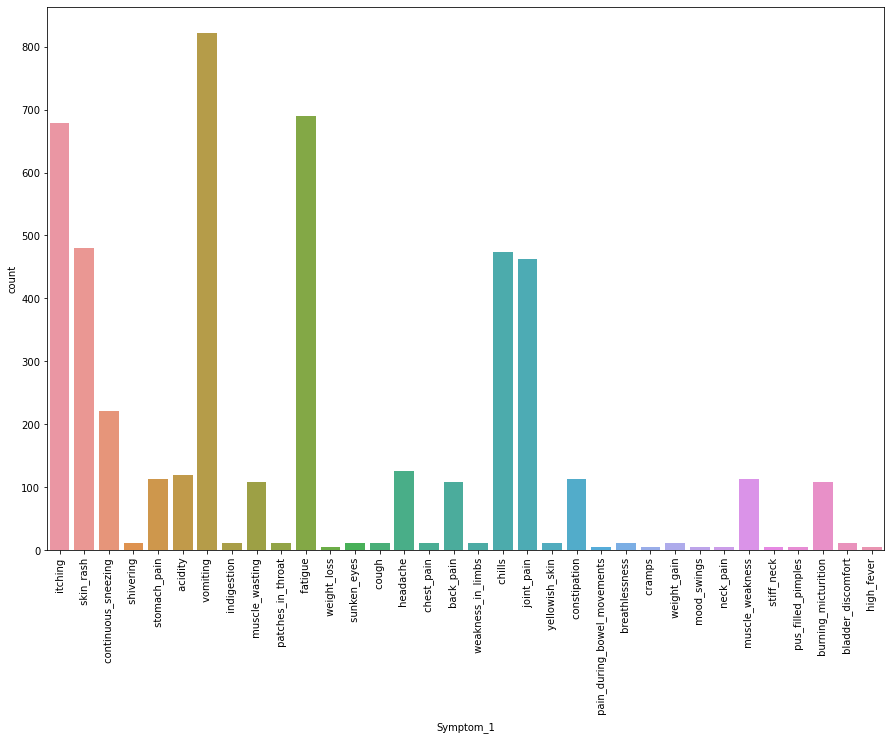

In [26]:
#count of Symptom_1 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_1']);

In [ ]:
#Vomiting is the most common symptom for all the diseases
#Fatigue and itching is also common for all

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


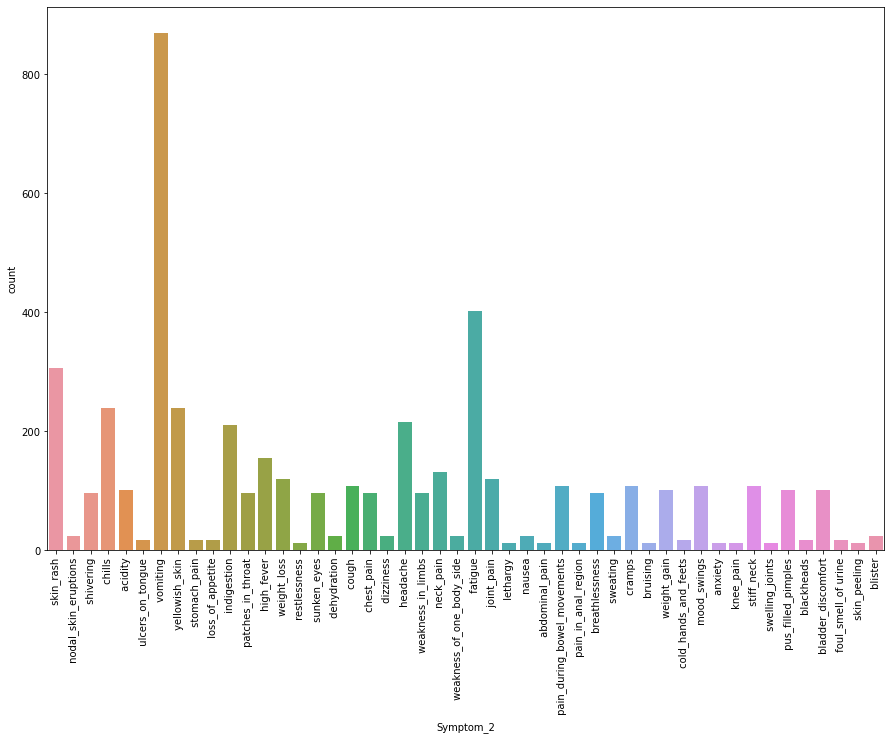

In [27]:
#count of Symptom_2 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_2']);

In [ ]:
#Vomiting is the 2nd most common symptom for all the diseases

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


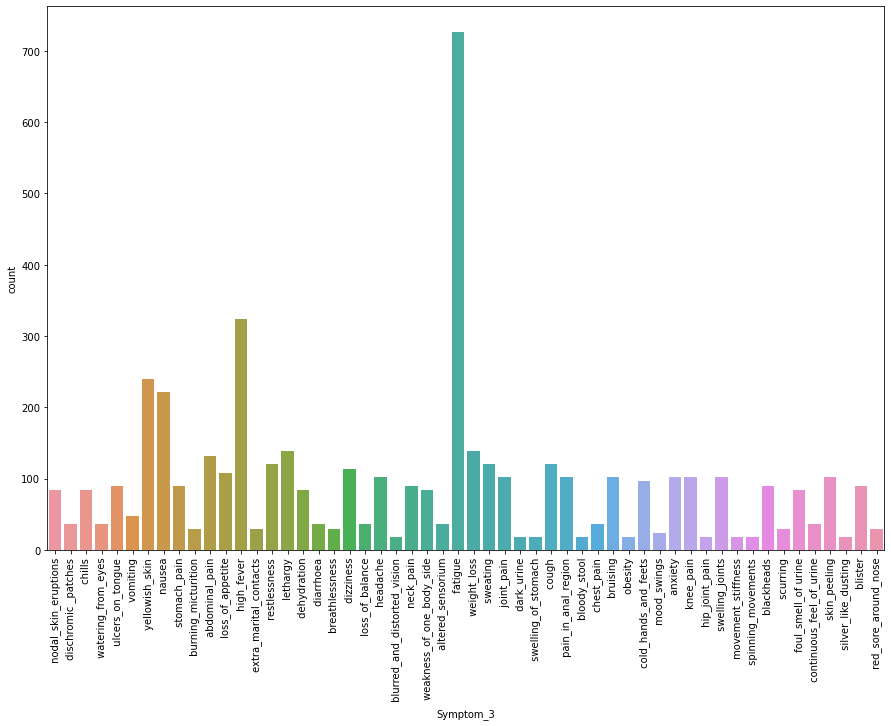

In [29]:
#count of Symptom_3 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_3']);

In [ ]:
#Fatigue is the most common 3rd symptom for all the diseases

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


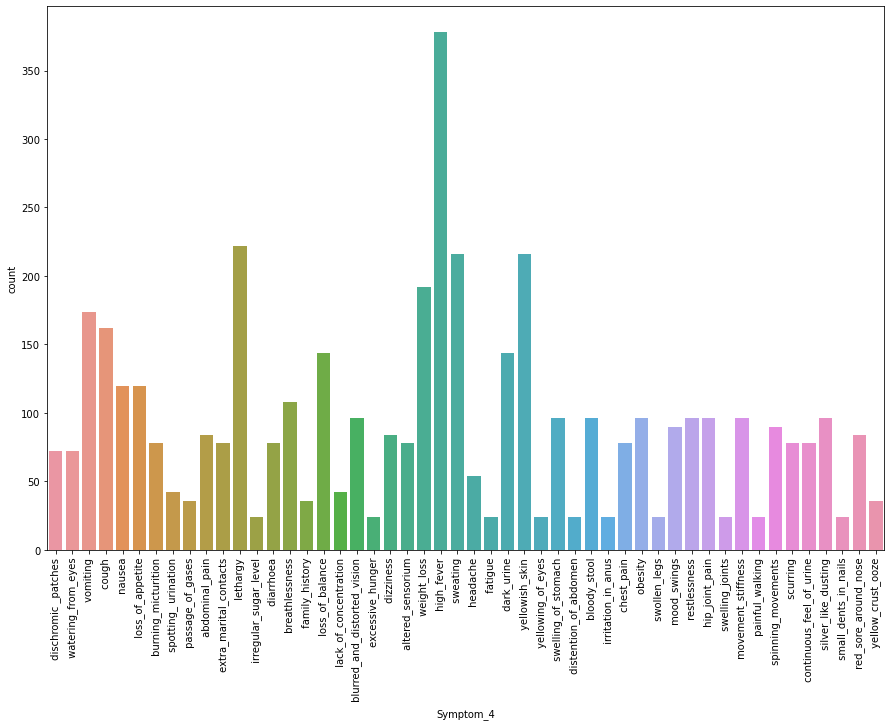

In [65]:
#count of Symptom_4 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_4']);

In [ ]:
#high_fever is the most common 4th symptom for all the diseases

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


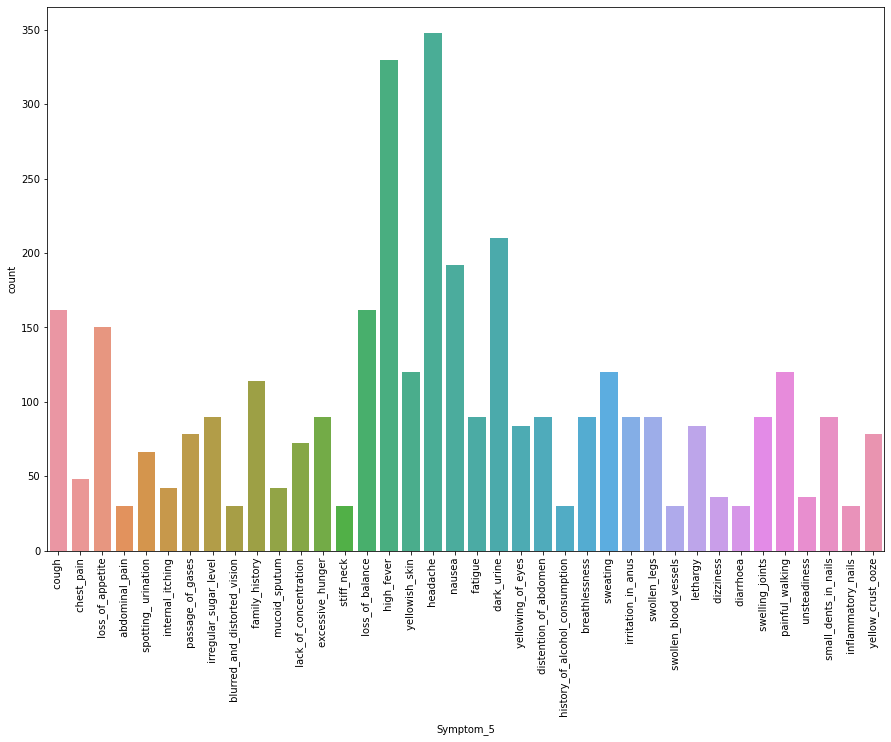

In [66]:
#count of Symptom_5 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_5']);

In [ ]:
#Headache and High fever are the most common 5th symptom for all the diseases

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


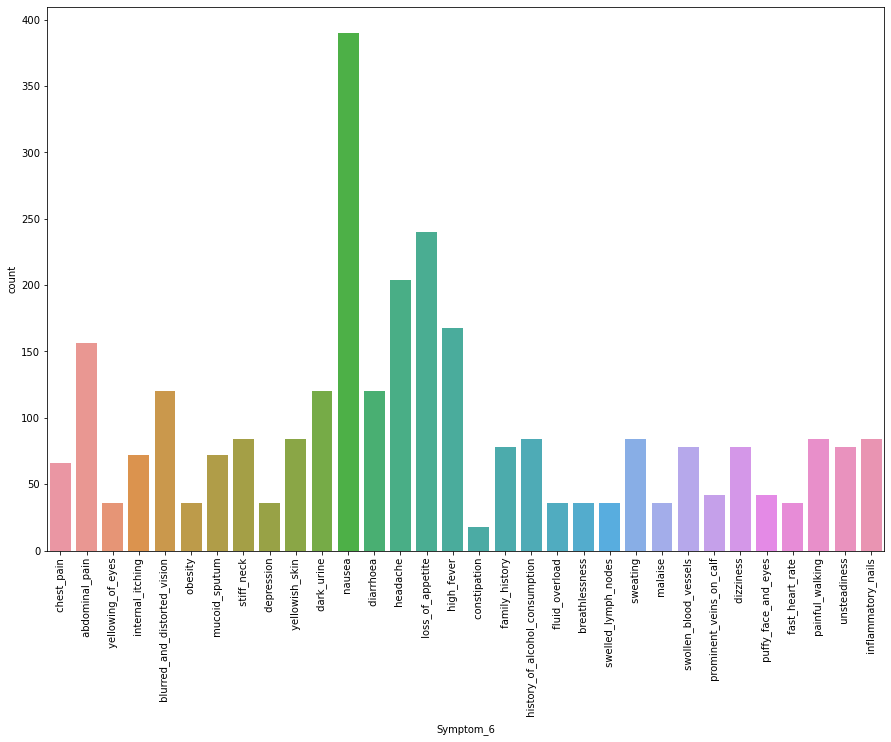

In [67]:
#count of Symptom_6 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_6']);

In [ ]:
#Nausea is the most common 6th symptom for all the diseases

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


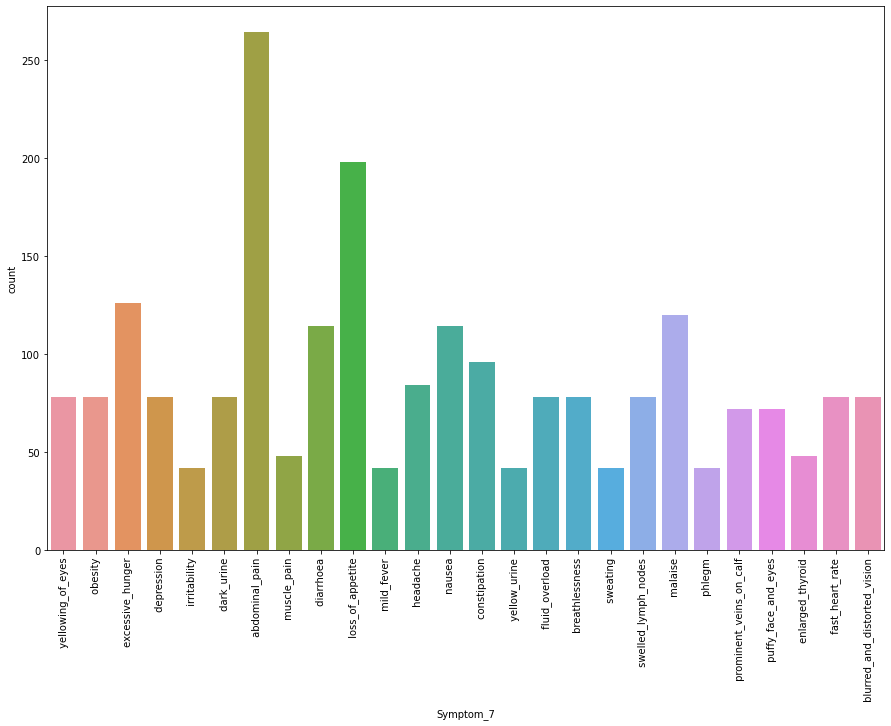

In [68]:
#count of Symptom_7 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_7']);

In [ ]:
#abdominal_pain is the most common 7th symptom for all the diseases
#also noted that from 7th symptom onwards the number of unique symptom categories decreases

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


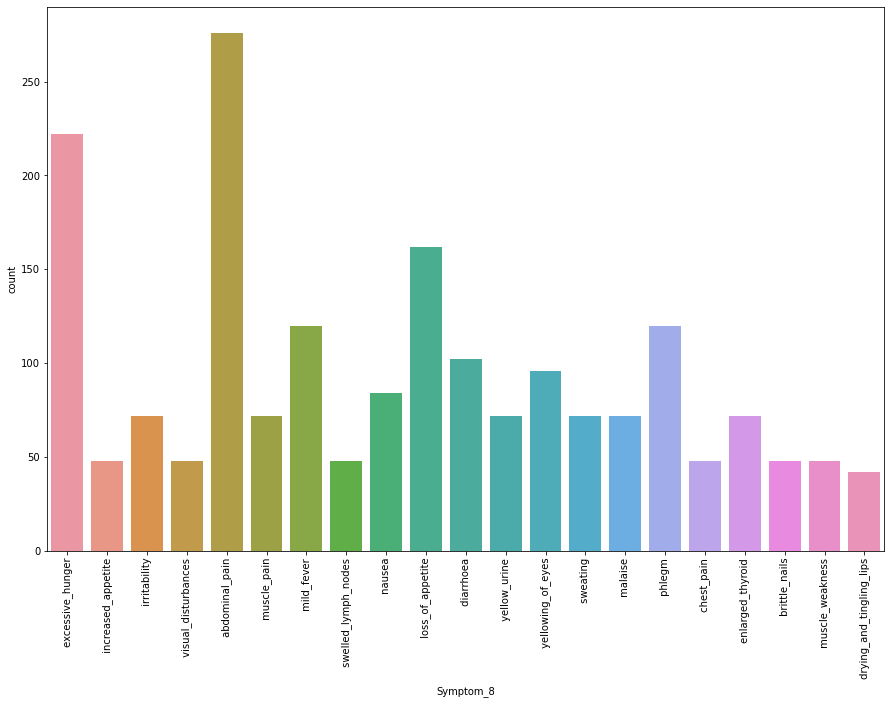

In [69]:
#count of Symptom_8 in dataset1
plt.figure(figsize=(15,10))
plt.xticks(rotation=90);
pr1=sns.countplot(data['Symptom_8']);

In [ ]:
#abdominal_pain is the most common 8th symptom for all the diseases
#also noted that 8th symptom contains only 21 unique symptom categories 

# Bivaraiate Analysis

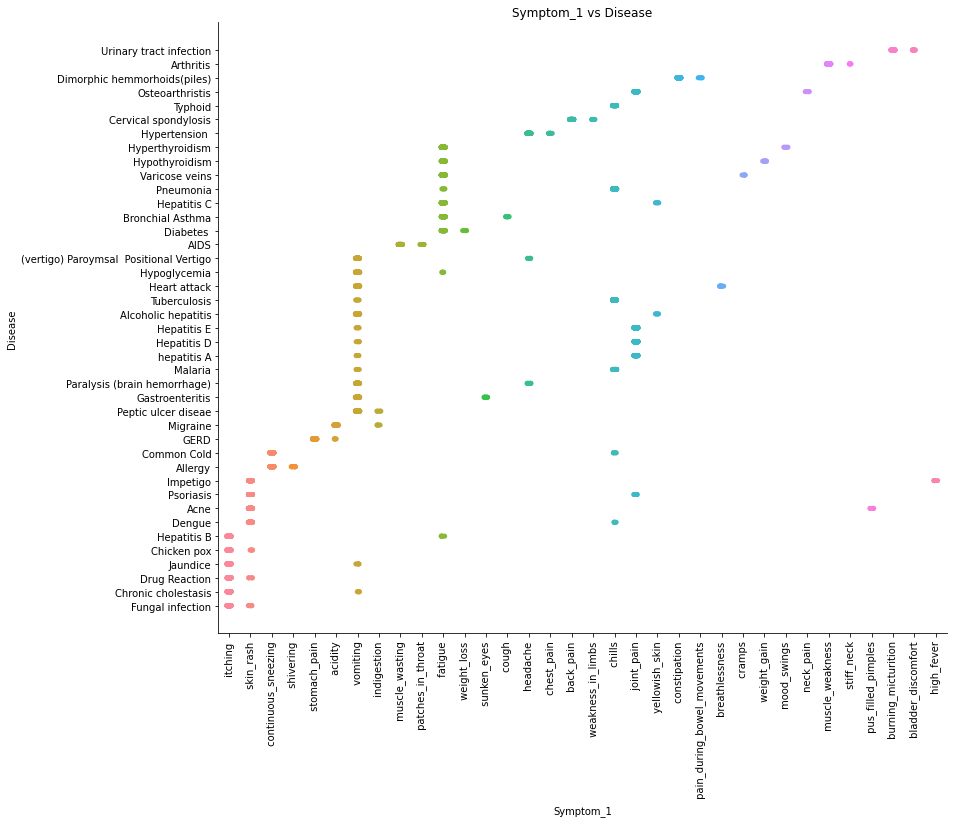

In [57]:
#How Symptom_1 is related to each Disease
#How important is Symptom_1 for Disease column
sns.catplot(x="Symptom_1", y="Disease", data=data);
plt.title("Symptom_1 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

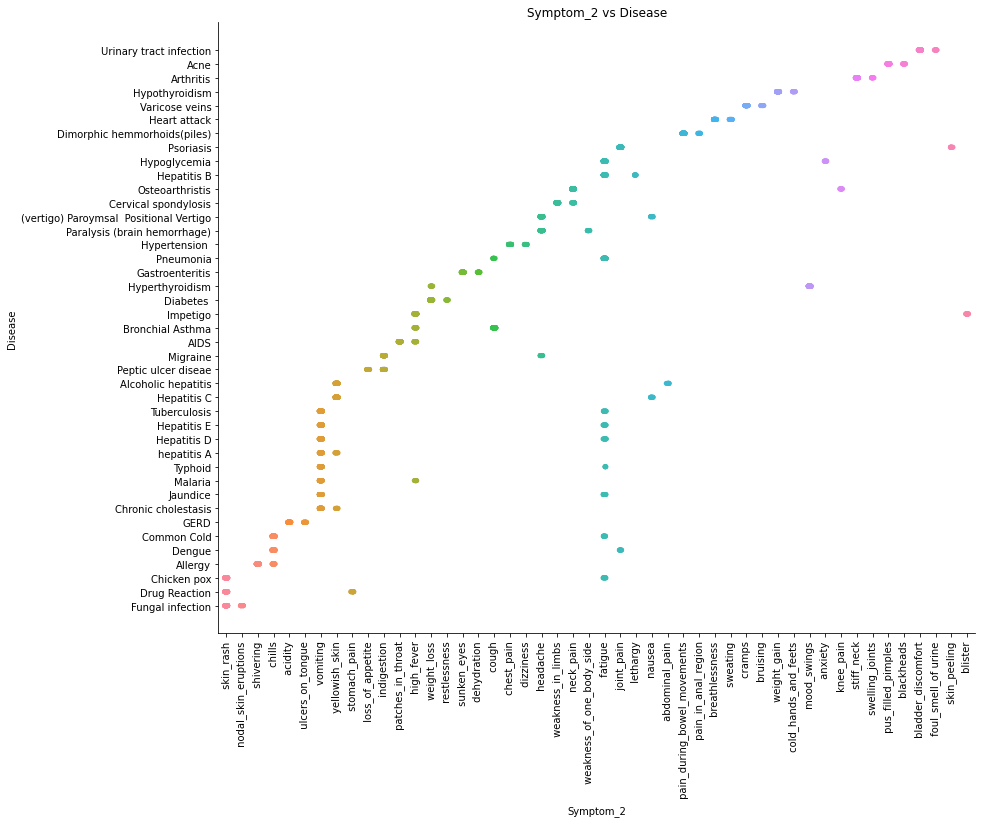

In [58]:
#How Symptom_2 is related to each Disease
#How important is Symptom_2 for Disease column
sns.catplot(x="Symptom_2", y="Disease", data=data);
plt.title("Symptom_2 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

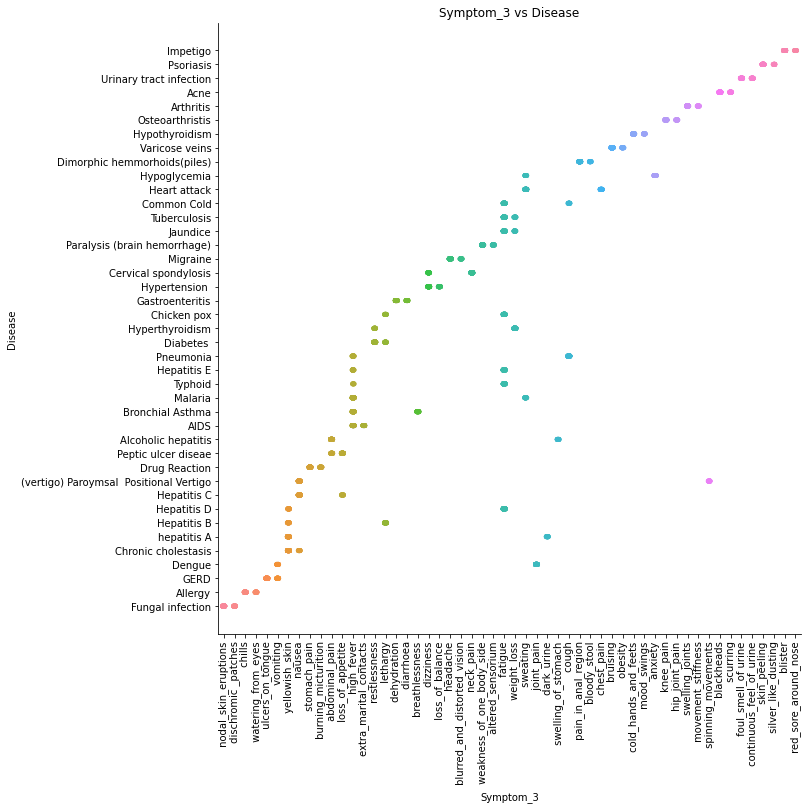

In [59]:
#How Symptom_3 is related to each Disease
#How important is Symptom_3 for Disease column
sns.catplot(x="Symptom_3", y="Disease", data=data);
plt.title("Symptom_3 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

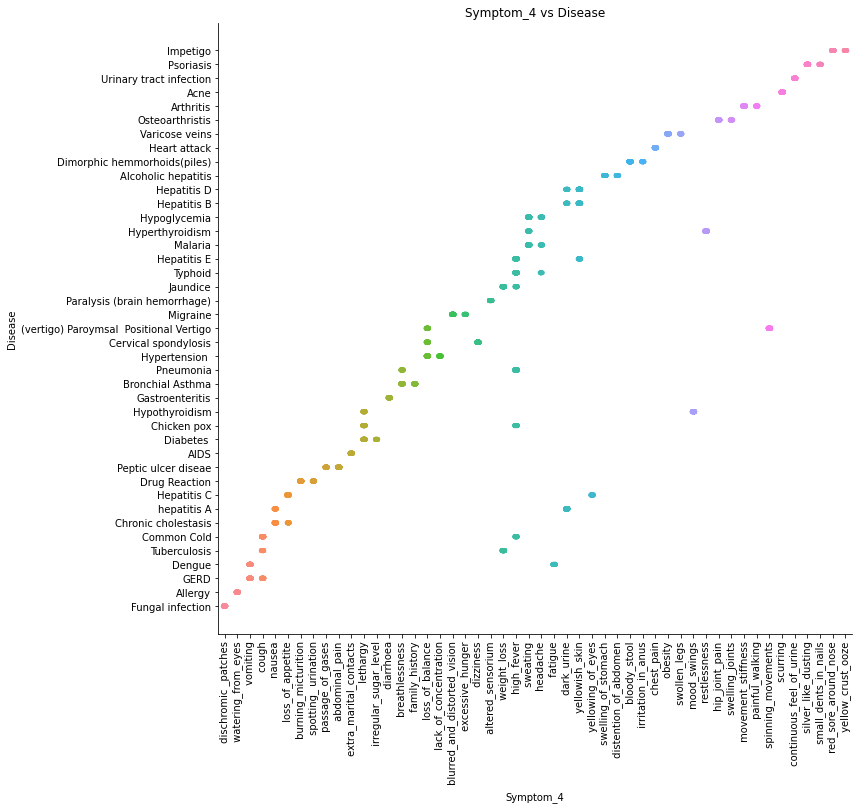

In [60]:
#How Symptom_4 is related to each Disease
#How important is Symptom_4 for Disease column
sns.catplot(x="Symptom_4", y="Disease", data=data);
plt.title("Symptom_4 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

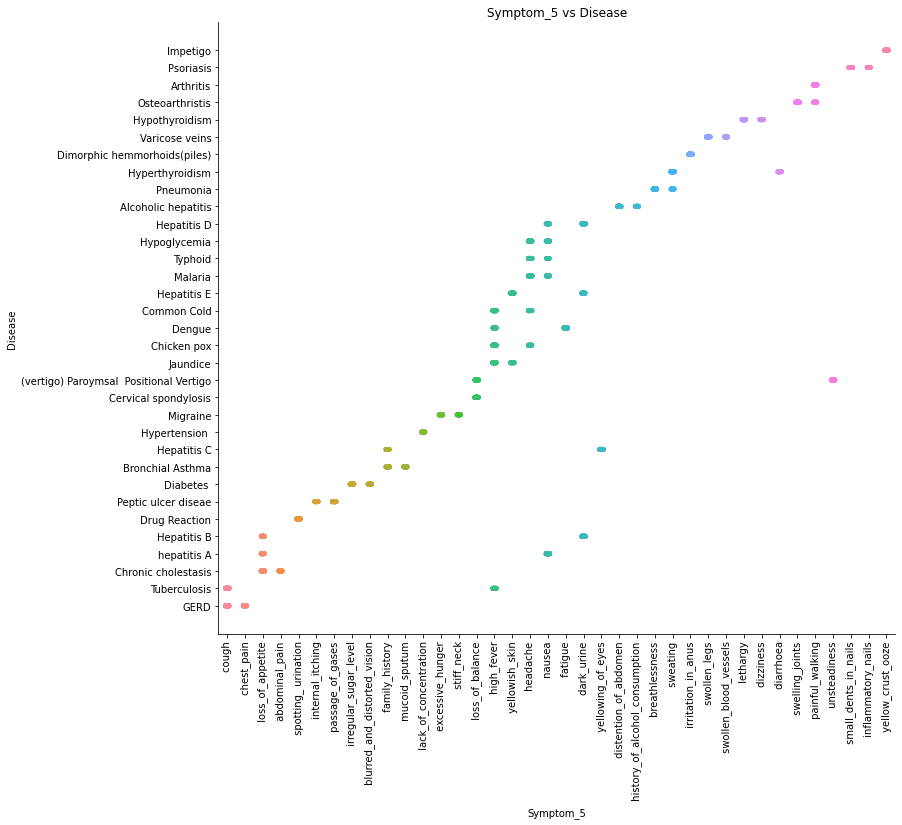

In [61]:
#How Symptom_5 is related to each Disease
#How important is Symptom_5 for Disease column
sns.catplot(x="Symptom_5", y="Disease", data=data);
plt.title("Symptom_5 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

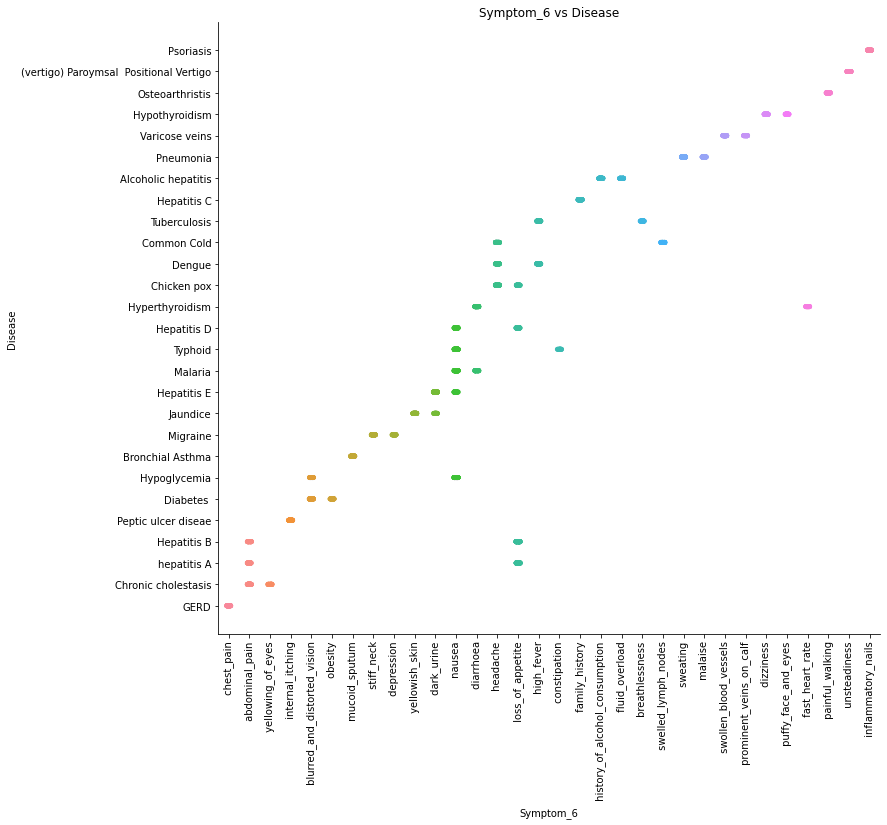

In [62]:
#How Symptom_6 is related to each Disease
#How important is Symptom_6 for Disease column
sns.catplot(x="Symptom_6", y="Disease", data=data);
plt.title("Symptom_6 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

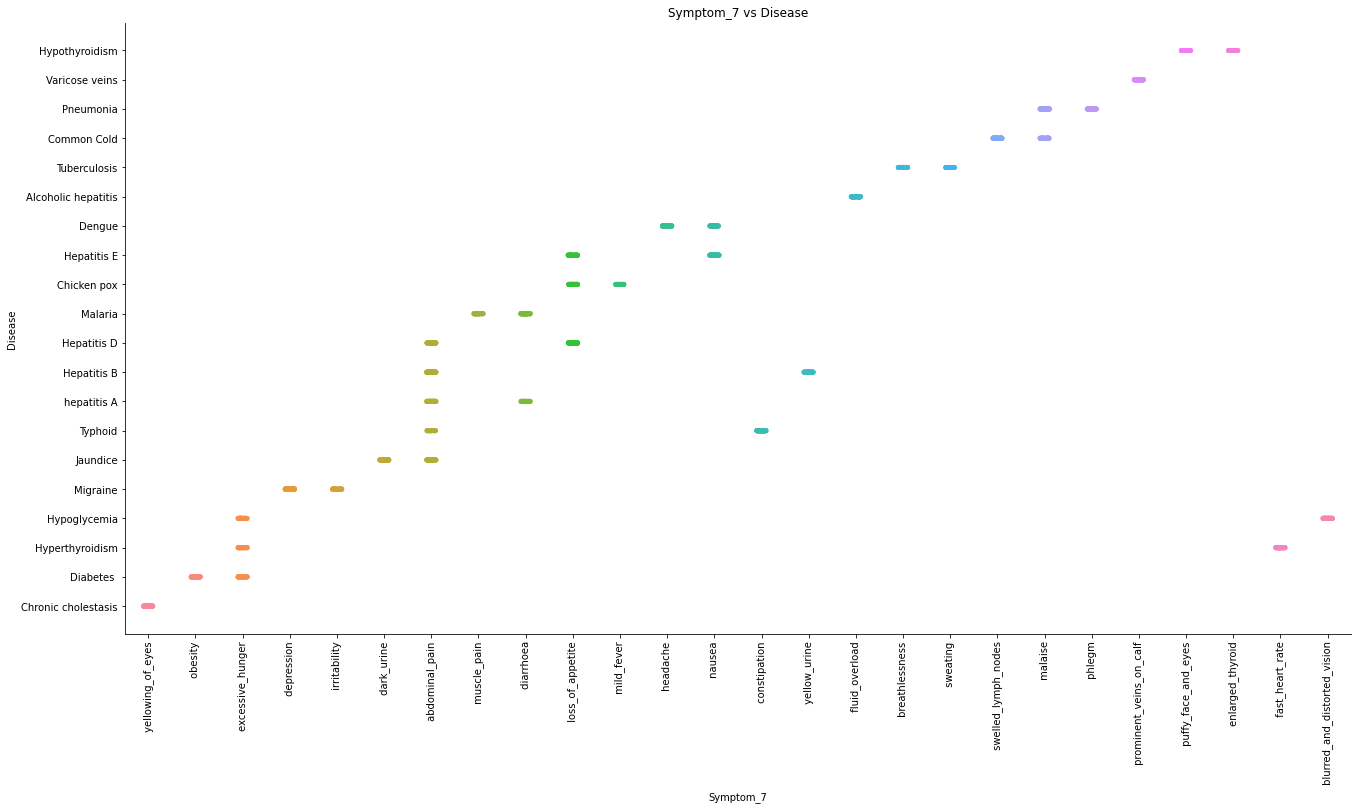

In [63]:
#How Symptom_7 is related to each Disease
#How important is Symptom_7 for Disease column
sns.catplot(x="Symptom_7", y="Disease", data=data);
plt.title("Symptom_7 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

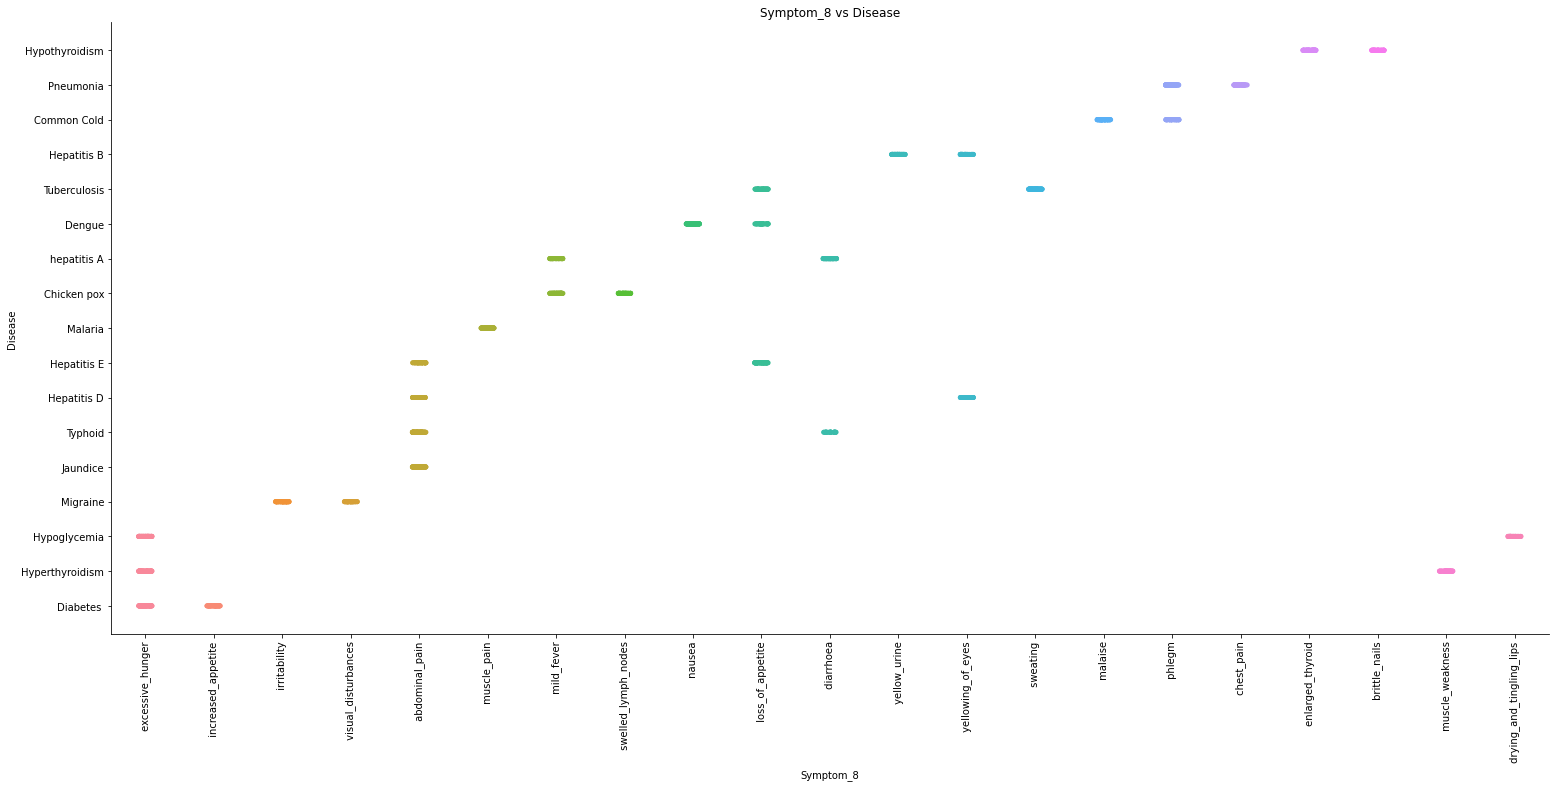

In [64]:
#How Symptom_8 is related to each Disease
#How important is Symptom_8 for Disease column
sns.catplot(x="Symptom_8", y="Disease", data=data);
plt.title("Symptom_8 vs Disease")
plt.gcf().set_size_inches((40,10))
plt.xticks(rotation=90);
plt.show()

In [ ]:
#Each disease is related to some of the Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6 contents.
#From Symptom_7 onwards the disease column is not fully dependent because most of the disease cases there is having not more than 6 symptoms

In [64]:
from  pandas_profiling import ProfileReport
ProfileReport(data, title= "pandas profile report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#display the second dataset
data1

Symptom  weight
0                 itching       1
1               skin_rash       3
2    nodal_skin_eruptions       4
3     continuous_sneezing       4
4               shivering       5
..                    ...     ...
128    inflammatory_nails       2
129               blister       4
130  red_sore_around_nose       2
131     yellow_crust_ooze       3
132             prognosis       5

[133 rows x 2 columns]

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
#no missing values
#it contains only 2 columns
#symptom column and its appropriate weight column

In [11]:
data1['Symptom'].nunique()

132

In [12]:
#Symptom column contains 132 unique values

<AxesSubplot:xlabel='weight', ylabel='Count'>

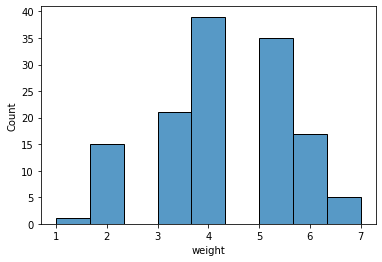

In [13]:
#Distribution of weight among symptoms
sns.histplot(data=data1, x="weight")

In [14]:
#Highest weight of a symptom is 7
#Lowest weight is 1
#Most of the symptoms have a weight score of 4
#Only few symptoms have score 1
#Weight of the symptoms range from 1 to 7

In [65]:
ProfileReport(data1, title= "pandas profile report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
#display the third dataset
data2

Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                 Diabetes   
13                                 Impetigo   
14                             Hypertension   
15                      Peptic ulcer diseae   
16             Dimorphic hemorrhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cervical spondylosis   
20                          Hyperthyroidism   
21                  Urinary tract infection   
22                           Varicose veins   
23                                     AIDS   
24             Paralysis (brain hemorrhage)   
25                                  Typhoid   
26                              Hepatitis B   
27                         Fungal infection   
28                              Hepatitis C   
29                                 Migraine   
30                         Bronchial Asthma   
31                      Alcoholic hepatitis   
32                                 Jaundice   
33                              Hepatitis E   
34                                   Dengue   
35                              Hepatitis D   
36                             Heart attack   
37                                Pneumonia   
38                                Arthritis   
39                          Gastroenteritis   
40                             Tuberculosis   

                                          Description  
0   An adverse drug reaction (ADR) is an injury ca...  
1   An infectious disease caused by protozoan para...  
2   An allergy is an immune system response to a f...  
3   Hypothyroidism, also called underactive thyroi...  
4   Psoriasis is a common skin disorder that forms...  
5   Gastroesophageal reflux disease, or GERD, is a...  
6   Chronic cholestatic diseases, whether occurrin...  
7   Hepatitis A is a highly contagious liver infec...  
8   Osteoarthritis is the most common form of arth...  
9   Benign paroxysmal positional vertigo (BPPV) is...  
10   Hypoglycemia is a condition in which your blo...  
11  Acne vulgaris is the formation of comedones, p...  
12  Diabetes is a disease that occurs when your bl...  
13  Impetigo (im-puh-TIE-go) is a common and highl...  
14  Hypertension (HTN or HT), also known as high b...  
15  Peptic ulcer disease (PUD) is a break in the i...  
16  Hemorrhoids, also spelled haemorrhoids, are va...  
17  The common cold is a viral infection of your n...  
18  Chickenpox is a highly contagious disease caus...  
19  Cervical spondylosis is a general term for age...  
20  Hyperthyroidism (overactive thyroid) occurs wh...  
21  Urinary tract infection: An infection of the k...  
22  A vein that has enlarged and twisted, often ap...  
23  Acquired immunodeficiency syndrome (AIDS) is a...  
24  Intracerebral hemorrhage (ICH) is when blood s...  
25  An acute illness characterized by fever caused...  
26  Hepatitis B is an infection of your liver. It ...  
27  In humans, fungal infections occur when an inv...  
28  Inflammation of the liver due to the hepatitis...  
29  A migraine can cause severe throbbing pain or ...  
30  Bronchial asthma is a medical condition which ...  
31  Alcoholic hepatitis is a diseased, inflammator...  
32  Yellow staining of the skin and sclerae (the w...  
33  A rare form of liver inflammation caused by in...  
34  an acute infectious disease caused by a flaviv...  
35  Hepatitis D, also known as the hepatitis 

In [27]:
#Description of dataset3
data2.describe()

Disease                                        Description
count              41                                                 41
unique             41                                                 41
top     Drug Reaction  An adverse drug reaction (ADR) is an injury ca...
freq                1                                                  1

In [28]:
#Information about dataset3
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [29]:
#It contains Disease and its description about each disease
#No missing values

In [30]:
data2.shape

(41, 2)

In [31]:
#It contains 41 rows and 2 columns 

In [32]:
data2.columns

Index(['Disease', 'Description'], dtype='object')

In [33]:
#It contains disease and its description

In [34]:
data2['Disease'].nunique()

41

In [35]:
#Disease column contains 41 unique values

In [36]:
#Dataset 4
data3

Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                Diabetes    
13                                 Impetigo   
14                            Hypertension    
15                      Peptic ulcer diseae   
16             Dimorphic hemmorhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cervical spondylosis   
20                          Hyperthyroidism   
21                  Urinary tract infection   
22                           Varicose veins   
23                                     AIDS   
24             Paralysis (brain hemorrhage)   
25                                  Typhoid   
26                              Hepatitis B   
27                         Fungal infection   
28                              Hepatitis C   
29                                 Migraine   
30                         Bronchial Asthma   
31                      Alcoholic hepatitis   
32                                 Jaundice   
33                              Hepatitis E   
34                                   Dengue   
35                              Hepatitis D   
36                             Heart attack   
37                                Pneumonia   
38                                Arthritis   
39                          Gastroenteritis   
40                             Tuberculosis   

                            Precaution_1                        Precaution_2  \
0                        stop irritation            consult nearest hospital   
1               Consult nearest hospital                     avoid oily food   
2                         apply calamine             cover area with bandage   
3                          reduce stress                            exercise   
4       wash hands with warm soapy water        stop bleeding using pressure   
5                 avoid fatty spicy food       avoid lying down after eating   
6                             cold baths                  anti itch medicine   
7               Consult nearest hospital                  wash hands through   
8                          acetaminophen            consult nearest hospital   
9                               lie down         avoid sudden change in body   
10                      lie down on side                      check in pulse   
11                            bath twice              avoid fatty spicy food   
12                    have balanced diet                            exercise   
13      soak affected area in warm water                     use antibiotics   
14                            meditation                          salt baths   
15                avoid fatty spicy food              consume probiotic food   
16                avoid fatty spicy food                 consume witch hazel   
17           drink vitamin c rich drinks                         take vapour   
18                  use neem in bathing                  consume neem leaves   
19          use heating pad or cold pack                            exercise   
20                           eat healthy                             massage   
21                 drink plenty of water           increase vitamin c intake   
22  lie down flat and raise the leg high                        use oinments   
23                       avoid open cuts                wear ppe if possible   
24                               massage                     

In [37]:
#Information of dataset4
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [38]:
data3.shape

(41, 5)

In [39]:
#Dataset4 contains disease and its precautions 
#41 unique diseases are there
#Precaution_3 and 4 contains 1 missing value.

In [40]:
#Dataset 5 
data4

Serial No                                  Disease  \
0           1                         Fungal infection   
1           2                                  Allergy   
2           3                                     GERD   
3           4                      Chronic cholestasis   
4           5                            Drug Reaction   
5           6                      Peptic ulcer diseae   
6           7                                     AIDS   
7           8                                Diabetes    
8           9                          Gastroenteritis   
9          10                         Bronchial Asthma   
10         11                            Hypertension    
11         12                                 Migraine   
12         13                     Cervical spondylosis   
13         14             Paralysis (brain hemorrhage)   
14         15                                 Jaundice   
15         16                                  Malaria   
16         17                              Chicken pox   
17         18                                   Dengue   
18         19                                  Typhoid   
19         20                              hepatitis A   
20         21                              Hepatitis B   
21         22                              Hepatitis C   
22         23                              Hepatitis D   
23         24                              Hepatitis E   
24         25                      Alcoholic hepatitis   
25         26                             Tuberculosis   
26         27                              Common Cold   
27         28                                Pneumonia   
28         29             Dimorphic hemorrhoids(piles)   
29         30                             Heart attack   
30         31                           Varicose veins   
31         32                           Hypothyroidism   
32         33                          Hyperthyroidism   
33         34                             Hypoglycemia   
34         35                          Osteoarthristis   
35         36                                Arthritis   
36         37  (vertigo) Paroymsal  Positional Vertigo   
37         38                                     Acne   
38         39                  Urinary tract infection   
39         40                                Psoriasis   
40         41                                 Impetigo   

                                      Type of Doctors  \
0                                       Dermatologist   
1                                           Allergist   
2                                  Gastroenterologist   
3                                    Gastroenterology   
4                        Allergists and Immunologists   
5                                 Gastroenterologists   
6                      Infectious Disease Specialist.   
7                                    Endocrinologists   
8                                  Gastroenterologist   
9                                      Pulmonologist.   
10                                       Cardiologist   
11                                        Neurologist   
12                                        Orthopedist   
13                                       Neurologist.   
14                                Gastroenterologist    
15                      Infectious disease specialist   
16                                          Physician   
17                     Infectious diseases specialist   
18                                 General physician    
19                                       Hepatologist   
20  Primary care physicians, hepatologists, gastro...   
21  Primary care physicians, hepatologists, gastro...   
22  Gastroenterologist, Hepatologist, and Infectio...   
23  Gastroenterologist, Hepatologist, and Infectio...   
24                                 Gastroenterologist   
25                                      Pulmonologist   
26                          

In [41]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial No        41 non-null     int64 
 1   Disease          41 non-null     object
 2   Type of Doctors  41 non-null     object
 3   Link             41 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [42]:
#It contains Serial no,disease,type of doctors and link columns
#Except the serial column others are of type object
#Disease column contains 41 unique values
#No missing values

In [43]:
#Remove the whitespace from basic dataset
def whitespace_remover(data):
   
    # iterating over the columns
    for i in data.columns:
         
        # checking datatype of each columns
        if data[i].dtype == 'object':
             
            # applying strip function on column
            data[i] = data[i].str.strip()
        else:
             
            # if condn. is False then it will do nothing.
            pass
 
# applying whitespace_remover function on dataframe
whitespace_remover(data)

In [44]:
#Remove the whitespace from dataset2
data2['Disease']=data2['Disease'].str.strip()

In [45]:
#Merg the base dataset and dataset2 based on disease column
data_merg=pd.merge(data,data2,on='Disease')
data_merg

Disease  Symptom_1             Symptom_2             Symptom_3  \
0     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1     Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2     Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3     Fungal infection    itching             skin_rash   dischromic _patches   
4     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
...                ...        ...                   ...                   ...   
4795          Impetigo  skin_rash            high_fever               blister   
4796          Impetigo  skin_rash            high_fever               blister   
4797          Impetigo  skin_rash            high_fever               blister   
4798          Impetigo  skin_rash            high_fever               blister   
4799          Impetigo  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                NaN       NaN       NaN       NaN   
1                      NaN                NaN       NaN       NaN       NaN   
2                      NaN                NaN       NaN       NaN       NaN   
3                      NaN                NaN       NaN       NaN       NaN   
4                      NaN                NaN       NaN       NaN       NaN   
...                    ...                ...       ...       ...       ...   
4795  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4796  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4797  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4798  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4799  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
...        ...        ...        ...        ...        ...        ...   
4795       NaN        NaN        NaN        NaN        NaN        NaN   
4796       NaN        NaN        NaN        NaN        NaN        NaN   
4797       NaN        NaN        NaN        NaN        NaN        NaN   
4798       NaN        NaN        NaN        NaN        NaN        NaN   
4799       NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_15 Symptom_16 Symptom_17  \
0           NaN        NaN        NaN   
1           NaN        NaN        NaN   
2           NaN        NaN        NaN   
3           NaN        NaN        NaN   
4           NaN        NaN        NaN   
...         ...        ...        ...   
4795        NaN        NaN        NaN   
4796        NaN        NaN        NaN   
4797        NaN        NaN        NaN   
4798        NaN        NaN        NaN   
4799        NaN        NaN        NaN   

                                            Description  
0     In humans, fungal infections occur when an inv...  
1     In humans, fungal infections occur when an inv...  
2     In humans, fungal infections occur when an inv...  
3     In humans, fungal infections occur when an inv...  
4     In humans, fungal infections occur when an inv...  
...                                                 ...  
4795  Impetigo (im-puh-TIE-go) is a common and highl...  
4796  Impetigo (im-puh-TIE-go) is a common and highl...  
4797  Impetigo (im-puh-TIE-go) is a common and highl...  
4798  Impetigo (im-puh-TIE-go) is a common and highl...  
4799  Impetigo (im-puh-TIE-go) is a common and highl...  

[4800 rows x 19 columns]

In [46]:
data_merg['Disease'].nunique()

40

In [47]:
#Merged dataset contains only 4800 records,So some mismatching in the disease column data

In [48]:
#Unique values of Base dataset disease column 
data['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [49]:
#Unique values of merged dataset disease column 
data_merg['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Heart attack', 'Varicose veins', 'Hypothyroidism',
       'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

#'Dimorphic hemmorhoids(piles)' disease is missing in merged dataset

In [50]:
#Check the unique values of disease in dataset2
data2['Disease'].unique()

array(['Drug Reaction', 'Malaria', 'Allergy', 'Hypothyroidism',
       'Psoriasis', 'GERD', 'Chronic cholestasis', 'hepatitis A',
       'Osteoarthristis', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypoglycemia', 'Acne', 'Diabetes', 'Impetigo', 'Hypertension',
       'Peptic ulcer diseae', 'Dimorphic hemorrhoids(piles)',
       'Common Cold', 'Chicken pox', 'Cervical spondylosis',
       'Hyperthyroidism', 'Urinary tract infection', 'Varicose veins',
       'AIDS', 'Paralysis (brain hemorrhage)', 'Typhoid', 'Hepatitis B',
       'Fungal infection', 'Hepatitis C', 'Migraine', 'Bronchial Asthma',
       'Alcoholic hepatitis', 'Jaundice', 'Hepatitis E', 'Dengue',
       'Hepatitis D', 'Heart attack', 'Pneumonia', 'Arthritis',
       'Gastroenteritis', 'Tuberculosis'], dtype=object)

#Dimorphic hemorrhoids(piles) in data2
#Analysed that some spelling mistake found in both ,so need to change the spelling in base dataset

In [51]:
#Change the Dimorphic hemmorhoids(piles) with Dimorphic hemorrhoids(piles)
data.loc[(data['Disease'] == "Dimorphic hemmorhoids(piles)"),'Disease'] = 'Dimorphic hemorrhoids(piles)'

In [52]:
#Again merged both the datasets
data_merg2=pd.merge(data,data2,on='Disease')
data_merg2

Disease  Symptom_1             Symptom_2             Symptom_3  \
0     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1     Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2     Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3     Fungal infection    itching             skin_rash   dischromic _patches   
4     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
...                ...        ...                   ...                   ...   
4915          Impetigo  skin_rash            high_fever               blister   
4916          Impetigo  skin_rash            high_fever               blister   
4917          Impetigo  skin_rash            high_fever               blister   
4918          Impetigo  skin_rash            high_fever               blister   
4919          Impetigo  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                NaN       NaN       NaN       NaN   
1                      NaN                NaN       NaN       NaN       NaN   
2                      NaN                NaN       NaN       NaN       NaN   
3                      NaN                NaN       NaN       NaN       NaN   
4                      NaN                NaN       NaN       NaN       NaN   
...                    ...                ...       ...       ...       ...   
4915  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4916  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4917  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4918  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4919  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
...        ...        ...        ...        ...        ...        ...   
4915       NaN        NaN        NaN        NaN        NaN        NaN   
4916       NaN        NaN        NaN        NaN        NaN        NaN   
4917       NaN        NaN        NaN        NaN        NaN        NaN   
4918       NaN        NaN        NaN        NaN        NaN        NaN   
4919       NaN        NaN        NaN        NaN        NaN        NaN   

     Symptom_15 Symptom_16 Symptom_17  \
0           NaN        NaN        NaN   
1           NaN        NaN        NaN   
2           NaN        NaN        NaN   
3           NaN        NaN        NaN   
4           NaN        NaN        NaN   
...         ...        ...        ...   
4915        NaN        NaN        NaN   
4916        NaN        NaN        NaN   
4917        NaN        NaN        NaN   
4918        NaN        NaN        NaN   
4919        NaN        NaN        NaN   

                                            Description  
0     In humans, fungal infections occur when an inv...  
1     In humans, fungal infections occur when an inv...  
2     In humans, fungal infections occur when an inv...  
3     In humans, fungal infections occur when an inv...  
4     In humans, fungal infections occur when an inv...  
...                                                 ...  
4915  Impetigo (im-puh-TIE-go) is a common and highl...  
4916  Impetigo (im-puh-TIE-go) is a common and highl...  
4917  Impetigo (im-puh-TIE-go) is a common and highl...  
4918  Impetigo (im-puh-TIE-go) is a common and highl...  
4919  Impetigo (im-puh-TIE-go) is a common and highl...  

[4920 rows x 19 columns]

In [53]:
#Now it contains 4920 rows and 19 columns

In [54]:
#Remove the whitespaces from disease column of data3
data3['Disease']=data3['Disease'].str.strip()

In [55]:
#Merg the new dataset with dataset3 based on disease column
data_merg3=pd.merge(data_merg2,data3,on='Disease')
data_merg3

Disease  Symptom_1             Symptom_2             Symptom_3  \
0     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1     Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2     Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3     Fungal infection    itching             skin_rash   dischromic _patches   
4     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
...                ...        ...                   ...                   ...   
4795          Impetigo  skin_rash            high_fever               blister   
4796          Impetigo  skin_rash            high_fever               blister   
4797          Impetigo  skin_rash            high_fever               blister   
4798          Impetigo  skin_rash            high_fever               blister   
4799          Impetigo  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                NaN       NaN       NaN       NaN   
1                      NaN                NaN       NaN       NaN       NaN   
2                      NaN                NaN       NaN       NaN       NaN   
3                      NaN                NaN       NaN       NaN       NaN   
4                      NaN                NaN       NaN       NaN       NaN   
...                    ...                ...       ...       ...       ...   
4795  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4796  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4797  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4798  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4799  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   

     Symptom_9  ... Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  \
0          NaN  ...        NaN        NaN        NaN        NaN        NaN   
1          NaN  ...        NaN        NaN        NaN        NaN        NaN   
2          NaN  ...        NaN        NaN        NaN        NaN        NaN   
3          NaN  ...        NaN        NaN        NaN        NaN        NaN   
4          NaN  ...        NaN        NaN        NaN        NaN        NaN   
...        ...  ...        ...        ...        ...        ...        ...   
4795       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4796       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4797       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4798       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4799       NaN  ...        NaN        NaN        NaN        NaN        NaN   

                                            Description  \
0     In humans, fungal infections occur when an inv...   
1     In humans, fungal infections occur when an inv...   
2     In humans, fungal infections occur when an inv...   
3     In humans, fungal infections occur when an inv...   
4     In humans, fungal infections occur when an inv...   
...                                                 ...   
4795  Impetigo (im-puh-TIE-go) is a common and highl...   
4796  Impetigo (im-puh-TIE-go) is a common and highl...   
4797  Impetigo (im-puh-TIE-go) is a common and highl...   
4798  Impetigo (im-puh-TIE-go) is a common and highl...   
4799  Impetigo (im-puh-TIE-go) is a common and highl...   

                          Precaution_1                        Precaution_2  \
0                           bath twice  use detol or neem in bathing water   
1                           bath twice  use detol or neem in bathing water   
2                           bath twice  use detol or neem in bathing water   
3                           bath twice  use detol or neem in bathing water   
4                           bath twice  use detol or neem

In [56]:
#It only dispaly 4800 records
#So again going to check the missing disease value

In [57]:
#Checking the unique values of disease in dataset3
data3['Disease'].unique()

array(['Drug Reaction', 'Malaria', 'Allergy', 'Hypothyroidism',
       'Psoriasis', 'GERD', 'Chronic cholestasis', 'hepatitis A',
       'Osteoarthristis', '(vertigo) Paroymsal  Positional Vertigo',
       'Hypoglycemia', 'Acne', 'Diabetes', 'Impetigo', 'Hypertension',
       'Peptic ulcer diseae', 'Dimorphic hemmorhoids(piles)',
       'Common Cold', 'Chicken pox', 'Cervical spondylosis',
       'Hyperthyroidism', 'Urinary tract infection', 'Varicose veins',
       'AIDS', 'Paralysis (brain hemorrhage)', 'Typhoid', 'Hepatitis B',
       'Fungal infection', 'Hepatitis C', 'Migraine', 'Bronchial Asthma',
       'Alcoholic hepatitis', 'Jaundice', 'Hepatitis E', 'Dengue',
       'Hepatitis D', 'Heart attack', 'Pneumonia', 'Arthritis',
       'Gastroenteritis', 'Tuberculosis'], dtype=object)

In [58]:
#Checking the unique values of disease in merged dataset
data_merg3['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Heart attack', 'Varicose veins', 'Hypothyroidism',
       'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [59]:
#Dimorphic hemorrhoids(piles) is missing in merged column

In [60]:
#So change the spelling of Dimorphic hemmorhoids(piles) to Dimorphic hemorrhoids(piles) in dataset3
data3.loc[(data3['Disease'] == "Dimorphic hemmorhoids(piles)"),'Disease'] = 'Dimorphic hemorrhoids(piles)'

In [61]:
#Again merged it
data_merg4=pd.merge(data_merg2,data3,on='Disease')
data_merg4

Disease  Symptom_1             Symptom_2             Symptom_3  \
0     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1     Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2     Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3     Fungal infection    itching             skin_rash   dischromic _patches   
4     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
...                ...        ...                   ...                   ...   
4915          Impetigo  skin_rash            high_fever               blister   
4916          Impetigo  skin_rash            high_fever               blister   
4917          Impetigo  skin_rash            high_fever               blister   
4918          Impetigo  skin_rash            high_fever               blister   
4919          Impetigo  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                NaN       NaN       NaN       NaN   
1                      NaN                NaN       NaN       NaN       NaN   
2                      NaN                NaN       NaN       NaN       NaN   
3                      NaN                NaN       NaN       NaN       NaN   
4                      NaN                NaN       NaN       NaN       NaN   
...                    ...                ...       ...       ...       ...   
4915  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4916  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4917  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4918  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4919  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   

     Symptom_9  ... Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  \
0          NaN  ...        NaN        NaN        NaN        NaN        NaN   
1          NaN  ...        NaN        NaN        NaN        NaN        NaN   
2          NaN  ...        NaN        NaN        NaN        NaN        NaN   
3          NaN  ...        NaN        NaN        NaN        NaN        NaN   
4          NaN  ...        NaN        NaN        NaN        NaN        NaN   
...        ...  ...        ...        ...        ...        ...        ...   
4915       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4916       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4917       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4918       NaN  ...        NaN        NaN        NaN        NaN        NaN   
4919       NaN  ...        NaN        NaN        NaN        NaN        NaN   

                                            Description  \
0     In humans, fungal infections occur when an inv...   
1     In humans, fungal infections occur when an inv...   
2     In humans, fungal infections occur when an inv...   
3     In humans, fungal infections occur when an inv...   
4     In humans, fungal infections occur when an inv...   
...                                                 ...   
4915  Impetigo (im-puh-TIE-go) is a common and highl...   
4916  Impetigo (im-puh-TIE-go) is a common and highl...   
4917  Impetigo (im-puh-TIE-go) is a common and highl...   
4918  Impetigo (im-puh-TIE-go) is a common and highl...   
4919  Impetigo (im-puh-TIE-go) is a common and highl...   

                          Precaution_1                        Precaution_2  \
0                           bath twice  use detol or neem in bathing water   
1                           bath twice  use detol or neem in bathing water   
2                           bath twice  use detol or neem in bathing water   
3                           bath twice  use detol or neem in bathing water   
4                           bath twice  use detol or neem

In [62]:
#Now it contains 4920 records and 23 columns

In [63]:
#Drop the serial no column in dataset4
data4=data4.drop('Serial No',axis=1)

In [64]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Disease          41 non-null     object
 1   Type of Doctors  41 non-null     object
 2   Link             41 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [65]:
#Now it contains only 3 columns

In [66]:
#Remove the whitespaces from disease column
data4['Disease']=data4['Disease'].str.strip()

In [67]:
#Final merged dataset after merging with dataset4
final_data=pd.merge(data_merg4,data4,on='Disease')
final_data

Disease  Symptom_1             Symptom_2             Symptom_3  \
0     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1     Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2     Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3     Fungal infection    itching             skin_rash   dischromic _patches   
4     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
...                ...        ...                   ...                   ...   
4915          Impetigo  skin_rash            high_fever               blister   
4916          Impetigo  skin_rash            high_fever               blister   
4917          Impetigo  skin_rash            high_fever               blister   
4918          Impetigo  skin_rash            high_fever               blister   
4919          Impetigo  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                NaN       NaN       NaN       NaN   
1                      NaN                NaN       NaN       NaN       NaN   
2                      NaN                NaN       NaN       NaN       NaN   
3                      NaN                NaN       NaN       NaN       NaN   
4                      NaN                NaN       NaN       NaN       NaN   
...                    ...                ...       ...       ...       ...   
4915  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4916  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4917  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4918  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   
4919  red_sore_around_nose  yellow_crust_ooze       NaN       NaN       NaN   

     Symptom_9  ... Symptom_15 Symptom_16 Symptom_17  \
0          NaN  ...        NaN        NaN        NaN   
1          NaN  ...        NaN        NaN        NaN   
2          NaN  ...        NaN        NaN        NaN   
3          NaN  ...        NaN        NaN        NaN   
4          NaN  ...        NaN        NaN        NaN   
...        ...  ...        ...        ...        ...   
4915       NaN  ...        NaN        NaN        NaN   
4916       NaN  ...        NaN        NaN        NaN   
4917       NaN  ...        NaN        NaN        NaN   
4918       NaN  ...        NaN        NaN        NaN   
4919       NaN  ...        NaN        NaN        NaN   

                                            Description  \
0     In humans, fungal infections occur when an inv...   
1     In humans, fungal infections occur when an inv...   
2     In humans, fungal infections occur when an inv...   
3     In humans, fungal infections occur when an inv...   
4     In humans, fungal infections occur when an inv...   
...                                                 ...   
4915  Impetigo (im-puh-TIE-go) is a common and highl...   
4916  Impetigo (im-puh-TIE-go) is a common and highl...   
4917  Impetigo (im-puh-TIE-go) is a common and highl...   
4918  Impetigo (im-puh-TIE-go) is a common and highl...   
4919  Impetigo (im-puh-TIE-go) is a common and highl...   

                          Precaution_1                        Precaution_2  \
0                           bath twice  use detol or neem in bathing water   
1                           bath twice  use detol or neem in bathing water   
2                           bath twice  use detol or neem in bathing water   
3                           bath twice  use detol or neem in bathing water   
4                           bath twice  use detol or neem in bathing water   
...                                ...                                 ...   
4915  soak affected area in warm water                     use antibiotics   
4916  soak affected area in warm water                     use antibiotics   
4917  soa

In [68]:
#Final dataset information
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4920 entries, 0 to 4919
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Disease          4920 non-null   object
 1   Symptom_1        4920 non-null   object
 2   Symptom_2        4920 non-null   object
 3   Symptom_3        4920 non-null   object
 4   Symptom_4        4572 non-null   object
 5   Symptom_5        3714 non-null   object
 6   Symptom_6        2934 non-null   object
 7   Symptom_7        2268 non-null   object
 8   Symptom_8        1944 non-null   object
 9   Symptom_9        1692 non-null   object
 10  Symptom_10       1512 non-null   object
 11  Symptom_11       1194 non-null   object
 12  Symptom_12       744 non-null    object
 13  Symptom_13       504 non-null    object
 14  Symptom_14       306 non-null    object
 15  Symptom_15       240 non-null    object
 16  Symptom_16       192 non-null    object
 17  Symptom_17       72 non-null     

In [69]:
#It contains 25 categorical columns

In [70]:
#Checking for missing values
final_data.isna().sum()

Disease               0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Symptom_4           348
Symptom_5          1206
Symptom_6          1986
Symptom_7          2652
Symptom_8          2976
Symptom_9          3228
Symptom_10         3408
Symptom_11         3726
Symptom_12         4176
Symptom_13         4416
Symptom_14         4614
Symptom_15         4680
Symptom_16         4728
Symptom_17         4848
Description           0
Precaution_1          0
Precaution_2          0
Precaution_3        120
Precaution_4        120
Type of Doctors       0
Link                  0
dtype: int64

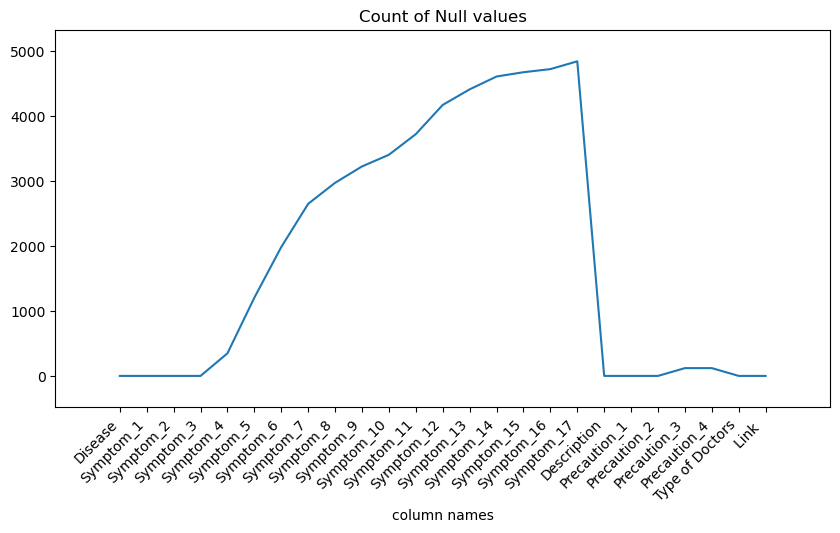

In [71]:
null_checker = final_data.apply(lambda x: sum(x.isnull())).to_frame(name='count')
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation = 45, horizontalalignment = 'right')
plt.title('Count of Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

In [72]:
#From symptom_4 to symptom_17 contains missing values
#missing value numbers also increased from symptom_4 to symptom_17
#Precaution_3 and precaution_4 contains 120 missing values

In [73]:
#select the records that contains missing values in precaution_3
final_data[final_data['Precaution_3'].isna()]

Disease            Symptom_1  Symptom_2           Symptom_3  \
120  Allergy  continuous_sneezing  shivering              chills   
121  Allergy            shivering     chills  watering_from_eyes   
122  Allergy  continuous_sneezing     chills  watering_from_eyes   
123  Allergy  continuous_sneezing  shivering  watering_from_eyes   
124  Allergy  continuous_sneezing  shivering              chills   
..       ...                  ...        ...                 ...   
235  Allergy  continuous_sneezing  shivering              chills   
236  Allergy  continuous_sneezing  shivering              chills   
237  Allergy  continuous_sneezing  shivering              chills   
238  Allergy  continuous_sneezing  shivering              chills   
239  Allergy  continuous_sneezing  shivering              chills   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
120  watering_from_eyes       NaN       NaN       NaN       NaN       NaN   
121                 NaN       NaN       NaN       NaN       NaN       NaN   
122                 NaN       NaN       NaN       NaN       NaN       NaN   
123                 NaN       NaN       NaN       NaN       NaN       NaN   
124                 NaN       NaN       NaN       NaN       NaN       NaN   
..                  ...       ...       ...       ...       ...       ...   
235  watering_from_eyes       NaN       NaN       NaN       NaN       NaN   
236  watering_from_eyes       NaN       NaN       NaN       NaN       NaN   
237  watering_from_eyes       NaN       NaN       NaN       NaN       NaN   
238  watering_from_eyes       NaN       NaN       NaN       NaN       NaN   
239  watering_from_eyes       NaN       NaN       NaN       NaN       NaN   

     ... Symptom_15 Symptom_16 Symptom_17  \
120  ...        NaN        NaN        NaN   
121  ...        NaN        NaN        NaN   
122  ...        NaN        NaN        NaN   
123  ...        NaN        NaN        NaN   
124  ...        NaN        NaN        NaN   
..   ...        ...        ...        ...   
235  ...        NaN        NaN        NaN   
236  ...        NaN        NaN        NaN   
237  ...        NaN        NaN        NaN   
238  ...        NaN        NaN        NaN   
239  ...        NaN        NaN        NaN   

                                           Description    Precaution_1  \
120  An allergy is an immune system response to a f...  apply calamine   
121  An allergy is an immune system response to a f...  apply calamine   
122  An allergy is an immune system response to a f...  apply calamine   
123  An allergy is an immune system response to a f...  apply calamine   
124  An allergy is an immune system response to a f...  apply calamine   
..                                                 ...             ...   
235  An allergy is an immune system response to a f...  apply calamine   
236  An allergy is an immune system response to a f...  apply calamine   
237  An allergy is an immune system response to a f...  apply calamine   
238  An allergy is an immune system response to a f...  apply calamine   
239  An allergy is an immune system response to a f...  apply calamine   

                Precaution_2 Precaution_3                 Precaution_4  \
120  cover area with bandage          NaN  use ice to compress itching   
121  cover area with bandage          NaN  use ice to compress itching   
122  cover area with bandage          NaN  use ice to compress itching   
123  cover area with bandage          NaN  use ice to compress itching   
124  cover area with bandage          NaN  use ice to compress itching   
..                       ...          ...                          ...   
235  cover area with bandage          NaN  use ice to compress itching   
236  cover area with bandage          NaN  use ice to compress itching   
237  cover area with bandage          NaN  use ice to compress itching   
238  cover area with bandage          NaN  use ice to compress itching   
239  cover area wit

In [74]:
#It shows that disease allergy has missing value in Precaution_3

In [75]:
#Handling the missing values in Precaution_3 by replacing it with 'Wear loose-fitting, cotton clothes'
final_data['Precaution_3']=final_data['Precaution_3'].fillna('Wear loose-fitting, cotton clothes')

In [76]:
##select the records that contains missing values in Precaution_4
final_data[final_data['Precaution_4'].isna()]

Disease       Symptom_1       Symptom_2   Symptom_3   Symptom_4  \
3480  Heart attack        vomiting  breathlessness    sweating  chest_pain   
3481  Heart attack        vomiting  breathlessness    sweating  chest_pain   
3482  Heart attack  breathlessness        sweating  chest_pain         NaN   
3483  Heart attack        vomiting        sweating  chest_pain         NaN   
3484  Heart attack        vomiting  breathlessness  chest_pain         NaN   
...            ...             ...             ...         ...         ...   
3595  Heart attack        vomiting  breathlessness    sweating  chest_pain   
3596  Heart attack        vomiting  breathlessness    sweating  chest_pain   
3597  Heart attack        vomiting  breathlessness    sweating  chest_pain   
3598  Heart attack        vomiting  breathlessness    sweating  chest_pain   
3599  Heart attack        vomiting  breathlessness    sweating  chest_pain   

     Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  ... Symptom_15  \
3480       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3481       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3482       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3483       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3484       NaN       NaN       NaN       NaN       NaN  ...        NaN   
...        ...       ...       ...       ...       ...  ...        ...   
3595       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3596       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3597       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3598       NaN       NaN       NaN       NaN       NaN  ...        NaN   
3599       NaN       NaN       NaN       NaN       NaN  ...        NaN   

     Symptom_16 Symptom_17                                        Description  \
3480        NaN        NaN  The death of heart muscle due to the loss of b...   
3481        NaN        NaN  The death of heart muscle due to the loss of b...   
3482        NaN        NaN  The death of heart muscle due to the loss of b...   
3483        NaN        NaN  The death of heart muscle due to the loss of b...   
3484        NaN        NaN  The death of heart muscle due to the loss of b...   
...         ...        ...                                                ...   
3595        NaN        NaN  The death of heart muscle due to the loss of b...   
3596        NaN        NaN  The death of heart muscle due to the loss of b...   
3597        NaN        NaN  The death of heart muscle due to the loss of b...   
3598        NaN        NaN  The death of heart muscle due to the loss of b...   
3599        NaN        NaN  The death of heart muscle due to the loss of b...   

        Precaution_1            Precaution_2 Precaution_3 Precaution_4  \
3480  call ambulance  chew or swallow asprin    keep calm          NaN   
3481  call ambulance  chew or swallow asprin    keep calm          NaN   
3482  call ambulance  chew or swallow asprin    keep calm          NaN   
3483  call ambulance  chew or swallow asprin    keep calm          NaN   
3484  call ambulance  chew or swallow asprin    keep calm          NaN   
...              ...                     ...          ...          ...   
3595  call ambulance  chew or swallow asprin    keep calm          NaN   
3596  call ambulance  chew or swallow asprin    keep calm          NaN   
3597  call ambulance  chew or swallow asprin    keep calm          NaN   
3598  call ambulance  chew or swallow asprin    keep calm          NaN   
3599  call ambulance  chew or swallow asprin    keep calm          NaN   

     Type of Doctors                                              Link   
3480   Cardiologist   https://www.mayoclinic.org/diseases-conditions...  
3481   Cardiologist   https://www.mayoclinic.org/diseases-conditions...  
3482   Cardiologist   https://www.mayoclinic.org/diseases-conditions...  
3483   Cardiologist   https

In [77]:
#It shows that disease Heart attack has missing value in Precaution_4

In [78]:
#Handling the missing values in Precaution_4 by replacing it with 'Begin CPR if the person is unconscious'
final_data['Precaution_4']=final_data['Precaution_4'].fillna('Begin CPR if the person is unconscious')

In [79]:
final_data.isna().sum()

Disease               0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Symptom_4           348
Symptom_5          1206
Symptom_6          1986
Symptom_7          2652
Symptom_8          2976
Symptom_9          3228
Symptom_10         3408
Symptom_11         3726
Symptom_12         4176
Symptom_13         4416
Symptom_14         4614
Symptom_15         4680
Symptom_16         4728
Symptom_17         4848
Description           0
Precaution_1          0
Precaution_2          0
Precaution_3          0
Precaution_4          0
Type of Doctors       0
Link                  0
dtype: int64

In [80]:
#Remaining all the missing values related to symptoms replaced with zero
final_data=final_data.fillna(0)

In [81]:
final_data.isna().sum()

Disease            0
Symptom_1          0
Symptom_2          0
Symptom_3          0
Symptom_4          0
Symptom_5          0
Symptom_6          0
Symptom_7          0
Symptom_8          0
Symptom_9          0
Symptom_10         0
Symptom_11         0
Symptom_12         0
Symptom_13         0
Symptom_14         0
Symptom_15         0
Symptom_16         0
Symptom_17         0
Description        0
Precaution_1       0
Precaution_2       0
Precaution_3       0
Precaution_4       0
Type of Doctors    0
Link               0
dtype: int64

In [82]:
#Checking missing values in data1
data1.isna().sum()

Symptom    0
weight     0
dtype: int64

In [83]:
#Description of final_data
final_data.describe()

Disease Symptom_1 Symptom_2 Symptom_3   Symptom_4  Symptom_5  \
count               4920      4920      4920      4920        4920       4920   
unique                41        34        48        54          51         39   
top     Fungal infection  vomiting  vomiting   fatigue  high_fever          0   
freq                 120       822       870       726         378       1206   

        Symptom_6  Symptom_7  Symptom_8  Symptom_9  ...  Symptom_15  \
count        4920       4920       4920       4920  ...        4920   
unique         33         27         22         23  ...           4   
top             0          0          0          0  ...           0   
freq         1986       2652       2976       3228  ...        4680   

        Symptom_16  Symptom_17  \
count         4920        4920   
unique           4           2   
top              0           0   
freq          4728        4848   

                                              Description  \
count                                                4920   
unique                                                 41   
top     In humans, fungal infections occur when an inv...   
freq                                                  120   

                  Precaution_1  Precaution_2    Precaution_3  Precaution_4  \
count                     4920          4920            4920          4920   
unique                      32            34              31            25   
top     avoid fatty spicy food      exercise  consult doctor     follow up   
freq                       360           360             720           720   

           Type of Doctors                                              Link   
count                 4920                                               4920  
unique                  33                                                 41  
top     Gastroenterologist  https://www.healthline.com/health/fungal-infec...  
freq                   360                                                120  

[4 rows x 25 columns]

In [84]:
#Checking the duplicates values in merged dataset
duplicate=final_data.duplicated()
print('number of duplicates=',sum(duplicate))

number of duplicates= 4616


In [85]:
#Checking the duplicates values in merged dataset
duplicate=data1.duplicated()
print('number of duplicates=',sum(duplicate))

number of duplicates= 0


In [86]:
#Checking the zero values in merged dataset
(final_data==0).sum()

Disease               0
Symptom_1             0
Symptom_2             0
Symptom_3             0
Symptom_4           348
Symptom_5          1206
Symptom_6          1986
Symptom_7          2652
Symptom_8          2976
Symptom_9          3228
Symptom_10         3408
Symptom_11         3726
Symptom_12         4176
Symptom_13         4416
Symptom_14         4614
Symptom_15         4680
Symptom_16         4728
Symptom_17         4848
Description           0
Precaution_1          0
Precaution_2          0
Precaution_3          0
Precaution_4          0
Type of Doctors       0
Link                  0
dtype: int64

In [87]:
#No zero values in dataset

In [88]:
df=final_data[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']]
df

Symptom_1             Symptom_2             Symptom_3  \
0       itching             skin_rash  nodal_skin_eruptions   
1     skin_rash  nodal_skin_eruptions   dischromic _patches   
2       itching  nodal_skin_eruptions   dischromic _patches   
3       itching             skin_rash   dischromic _patches   
4       itching             skin_rash  nodal_skin_eruptions   
...         ...                   ...                   ...   
4915  skin_rash            high_fever               blister   
4916  skin_rash            high_fever               blister   
4917  skin_rash            high_fever               blister   
4918  skin_rash            high_fever               blister   
4919  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                  0         0         0         0   
1                        0                  0         0         0         0   
2                        0                  0         0         0         0   
3                        0                  0         0         0         0   
4                        0                  0         0         0         0   
...                    ...                ...       ...       ...       ...   
4915  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4916  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4917  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4918  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4919  red_sore_around_nose  yellow_crust_ooze         0         0         0   

     Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
...        ...        ...        ...        ...        ...        ...   
4915         0          0          0          0          0          0   
4916         0          0          0          0          0          0   
4917         0          0          0          0          0          0   
4918         0          0          0          0          0          0   
4919         0          0          0          0          0          0   

     Symptom_15 Symptom_16 Symptom_17  
0             0          0          0  
1             0          0          0  
2             0          0          0  
3             0          0          0  
4             0          0          0  
...         ...        ...        ...  
4915          0          0          0  
4916          0          0          0  
4917          0          0          0  
4918          0          0          0  
4919          0          0          0  

[4920 rows x 17 columns]

In [89]:
#columns in df
col=df.columns
#Unique values of symptom column in data1
cols=data1['Symptom'].unique()
#unique values of entire dataset df
sym=df.values
sym

array([['itching', 'skin_rash', 'nodal_skin_eruptions', ..., 0, 0, 0],
       ['skin_rash', 'nodal_skin_eruptions', 'dischromic _patches', ...,
        0, 0, 0],
       ['itching', 'nodal_skin_eruptions', 'dischromic _patches', ..., 0,
        0, 0],
       ...,
       ['skin_rash', 'high_fever', 'blister', ..., 0, 0, 0],
       ['skin_rash', 'high_fever', 'blister', ..., 0, 0, 0],
       ['skin_rash', 'high_fever', 'blister', ..., 0, 0, 0]], dtype=object)

In [90]:
#Encoding the the symptoms with their severity weight
for i in range(len(cols)):
    sym[sym == cols[i]] = data1[data1['Symptom'] == cols[i]]['weight'].values[0]
#Convert the sym array to Dataframe
X=pd.DataFrame(sym,columns=col)

In [91]:
X

Symptom_1 Symptom_2            Symptom_3            Symptom_4 Symptom_5  \
0            1         3                    4  dischromic _patches         0   
1            3         4  dischromic _patches                    0         0   
2            1         4  dischromic _patches                    0         0   
3            1         3  dischromic _patches                    0         0   
4            1         3                    4                    0         0   
...        ...       ...                  ...                  ...       ...   
4915         3         7                    4                    2         3   
4916         3         7                    4                    2         3   
4917         3         7                    4                    2         3   
4918         3         7                    4                    2         3   
4919         3         7                    4                    2         3   

     Symptom_6 Symptom_7 Symptom_8 Symptom_9 Symptom_10 Symptom_11 Symptom_12  \
0            0         0         0         0          0          0          0   
1            0         0         0         0          0          0          0   
2            0         0         0         0          0          0          0   
3            0         0         0         0          0          0          0   
4            0         0         0         0          0          0          0   
...        ...       ...       ...       ...        ...        ...        ...   
4915         0         0         0         0          0          0          0   
4916         0         0         0         0          0          0          0   
4917         0         0         0         0          0          0          0   
4918         0         0         0         0          0          0          0   
4919         0         0         0         0          0          0          0   

     Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
0             0          0          0          0          0  
1             0          0          0          0          0  
2             0          0          0          0          0  
3             0          0          0          0          0  
4             0          0          0          0          0  
...         ...        ...        ...        ...        ...  
4915          0          0          0          0          0  
4916          0          0          0          0          0  
4917          0          0          0          0          0  
4918          0          0          0          0          0  
4919          0          0          0          0          0  

[4920 rows x 17 columns]

In [92]:
#Some of the symptoms are not replaced with weight

In [93]:
#Checking the counts based on each unique value of symptom_1
X['Symptom_1'].value_counts()

3    1926
4    1074
5     972
1     678
6     120
2     120
7      30
Name: Symptom_1, dtype: int64

In [94]:
#symptom_1 is fully replaced with weight

In [95]:
X['Symptom_2'].value_counts()

3                      1698
5                      1500
4                      1116
7                       348
2                       132
6                       108
foul_smell_of urine      18
Name: Symptom_2, dtype: int64

In [96]:
#For symptom_2 foul_smell_of urine is not replaced with weight

In [97]:
#Replace it with zero,because we don't know its exact weight
X = X.replace('foul_smell_of urine', 0)

In [98]:
X['Symptom_3'].value_counts()

4                      1974
3                      1014
5                       852
7                       378
2                       360
6                       222
0                        84
dischromic _patches      36
Name: Symptom_3, dtype: int64

In [99]:
#For symptom_3 dischromic _patches is not replaced with weight

In [100]:
#Replace it with zero,because we don't know its exact weight
X = X.replace('dischromic _patches', 0)

In [101]:
X['Symptom_4'].value_counts()

4                      1110
5                       900
3                       846
2                       702
7                       552
0                       420
6                       348
spotting_ urination      42
Name: Symptom_4, dtype: int64

In [102]:
#For symptom_4 spotting_ urination is not replaced with weight

In [104]:
#Replace it with zero,because we don't know its exact weight
X = X.replace('spotting_ urination', 0)

In [105]:
X['Symptom_5'].value_counts()

4    1344
0    1272
5     744
3     738
7     378
2     324
6     120
Name: Symptom_5, dtype: int64

In [106]:
#checking the information of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Symptom_1   4920 non-null   int64
 1   Symptom_2   4920 non-null   int64
 2   Symptom_3   4920 non-null   int64
 3   Symptom_4   4920 non-null   int64
 4   Symptom_5   4920 non-null   int64
 5   Symptom_6   4920 non-null   int64
 6   Symptom_7   4920 non-null   int64
 7   Symptom_8   4920 non-null   int64
 8   Symptom_9   4920 non-null   int64
 9   Symptom_10  4920 non-null   int64
 10  Symptom_11  4920 non-null   int64
 11  Symptom_12  4920 non-null   int64
 12  Symptom_13  4920 non-null   int64
 13  Symptom_14  4920 non-null   int64
 14  Symptom_15  4920 non-null   int64
 15  Symptom_16  4920 non-null   int64
 16  Symptom_17  4920 non-null   int64
dtypes: int64(17)
memory usage: 653.6 KB


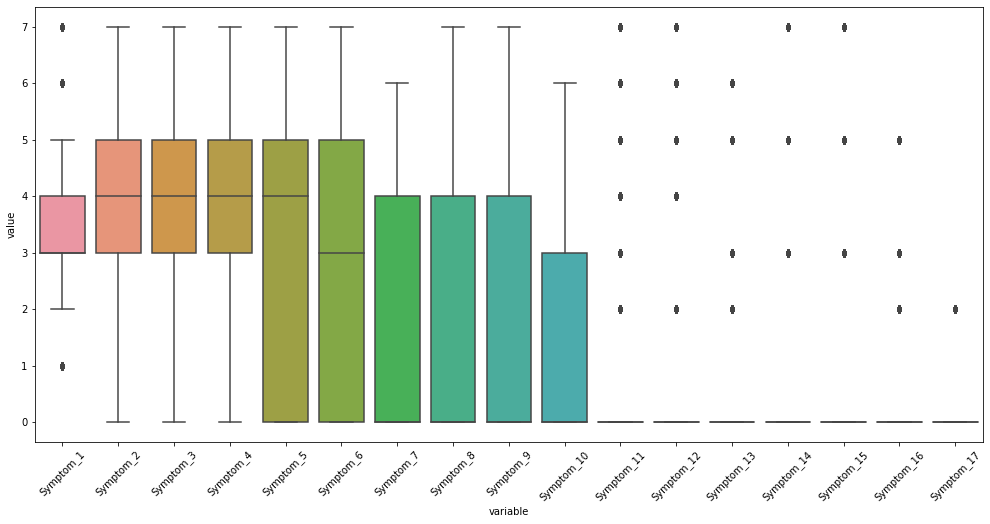

In [107]:
#Checking for the outliers in X dataset
plt.figure(figsize=(17,8))
ax=sns.boxplot(x="variable", y="value", data=pd.melt(X))
ax.tick_params(axis='x', rotation=45)
plt.show()

In [108]:
#Symptom_1,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_13 contains some outliers in the lower and upper end

In [109]:
#Created a new column named total weight which is the sum of all symptoms weight of particular disease
X['Totalweight'] = X.sum(axis = 1)

In [69]:
X

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0             1          3          4          0          0          0   
1             3          4          0          0          0          0   
2             1          4          0          0          0          0   
3             1          3          0          0          0          0   
4             1          3          4          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4915          3          7          4          2          3          0   
4916          3          7          4          2          3          0   
4917          3          7          4          2          3          0   
4918          3          7          4          2          3          0   
4919          3          7          4          2          3          0   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0             0          0          0           0           0           0   
1             0          0          0           0           0           0   
2             0          0          0           0           0           0   
3             0          0          0           0           0           0   
4             0          0          0           0           0           0   
...         ...        ...        ...         ...         ...         ...   
4915          0          0          0           0           0           0   
4916          0          0          0           0           0           0   
4917          0          0          0           0           0           0   
4918          0          0          0           0           0           0   
4919          0          0          0           0           0           0   

      Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  Totalweight  
0              0           0           0           0           0            8  
1              0           0           0           0           0            7  
2              0           0           0           0           0            5  
3              0           0           0           0           0            4  
4              0           0           0           0           0            8  
...          ...         ...         ...         ...         ...          ...  
4915           0           0           0           0           0           19  
4916           0           0           0           0           0           19  
4917           0           0           0           0           0           19  
4918           0           0           0           0           0           19  
4919           0           0           0           0           0           19  

[4920 rows x 18 columns]

In [110]:
#Extracted the total_weight column from x dataset and joined it with final_data dataset
extracted_col = X["Totalweight"]
final_data = final_data.join(extracted_col)
final_data

Disease  Symptom_1             Symptom_2             Symptom_3  \
0     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
1     Fungal infection  skin_rash  nodal_skin_eruptions   dischromic _patches   
2     Fungal infection    itching  nodal_skin_eruptions   dischromic _patches   
3     Fungal infection    itching             skin_rash   dischromic _patches   
4     Fungal infection    itching             skin_rash  nodal_skin_eruptions   
...                ...        ...                   ...                   ...   
4915          Impetigo  skin_rash            high_fever               blister   
4916          Impetigo  skin_rash            high_fever               blister   
4917          Impetigo  skin_rash            high_fever               blister   
4918          Impetigo  skin_rash            high_fever               blister   
4919          Impetigo  skin_rash            high_fever               blister   

                 Symptom_4          Symptom_5 Symptom_6 Symptom_7 Symptom_8  \
0      dischromic _patches                  0         0         0         0   
1                        0                  0         0         0         0   
2                        0                  0         0         0         0   
3                        0                  0         0         0         0   
4                        0                  0         0         0         0   
...                    ...                ...       ...       ...       ...   
4915  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4916  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4917  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4918  red_sore_around_nose  yellow_crust_ooze         0         0         0   
4919  red_sore_around_nose  yellow_crust_ooze         0         0         0   

     Symptom_9  ... Symptom_16 Symptom_17  \
0            0  ...          0          0   
1            0  ...          0          0   
2            0  ...          0          0   
3            0  ...          0          0   
4            0  ...          0          0   
...        ...  ...        ...        ...   
4915         0  ...          0          0   
4916         0  ...          0          0   
4917         0  ...          0          0   
4918         0  ...          0          0   
4919         0  ...          0          0   

                                            Description  \
0     In humans, fungal infections occur when an inv...   
1     In humans, fungal infections occur when an inv...   
2     In humans, fungal infections occur when an inv...   
3     In humans, fungal infections occur when an inv...   
4     In humans, fungal infections occur when an inv...   
...                                                 ...   
4915  Impetigo (im-puh-TIE-go) is a common and highl...   
4916  Impetigo (im-puh-TIE-go) is a common and highl...   
4917  Impetigo (im-puh-TIE-go) is a common and highl...   
4918  Impetigo (im-puh-TIE-go) is a common and highl...   
4919  Impetigo (im-puh-TIE-go) is a common and highl...   

                          Precaution_1                        Precaution_2  \
0                           bath twice  use detol or neem in bathing water   
1                           bath twice  use detol or neem in bathing water   
2                           bath twice  use detol or neem in bathing water   
3                           bath twice  use detol or neem in bathing water   
4                           bath twice  use detol or neem in bathing water   
...                                ...                                 ...   
4915  soak affected area in warm water                     use antibiotics   
4916  soak affected area in warm water                     use antibiotics   
4917  soak affected area in warm water                     use antibiotics   
4918  soak affected area in warm water                     use 

In [111]:
#Dropped that 'Totalweight' column from X dataset
X=X.drop('Totalweight',axis=1)

In [112]:
#Select the target column
y=final_data['Disease']

In [113]:
#Make the y column's name to Disease
y=pd.DataFrame(y,columns=['Disease'])

In [115]:
#Concatenate the datasets X with target dataset y
df1=pd.concat([X,y],axis=1)
df1

Symptom_1  Symptom_2  Symptom_3  Symptom_4  Symptom_5  Symptom_6  \
0             1          3          4          0          0          0   
1             3          4          0          0          0          0   
2             1          4          0          0          0          0   
3             1          3          0          0          0          0   
4             1          3          4          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4915          3          7          4          2          3          0   
4916          3          7          4          2          3          0   
4917          3          7          4          2          3          0   
4918          3          7          4          2          3          0   
4919          3          7          4          2          3          0   

      Symptom_7  Symptom_8  Symptom_9  Symptom_10  Symptom_11  Symptom_12  \
0             0          0          0           0           0           0   
1             0          0          0           0           0           0   
2             0          0          0           0           0           0   
3             0          0          0           0           0           0   
4             0          0          0           0           0           0   
...         ...        ...        ...         ...         ...         ...   
4915          0          0          0           0           0           0   
4916          0          0          0           0           0           0   
4917          0          0          0           0           0           0   
4918          0          0          0           0           0           0   
4919          0          0          0           0           0           0   

      Symptom_13  Symptom_14  Symptom_15  Symptom_16  Symptom_17  \
0              0           0           0           0           0   
1              0           0           0           0           0   
2              0           0           0           0           0   
3              0           0           0           0           0   
4              0           0           0           0           0   
...          ...         ...         ...         ...         ...   
4915           0           0           0           0           0   
4916           0           0           0           0           0   
4917           0           0           0           0           0   
4918           0           0           0           0           0   
4919           0           0           0           0           0   

               Disease  
0     Fungal infection  
1     Fungal infection  
2     Fungal infection  
3     Fungal infection  
4     Fungal infection  
...                ...  
4915          Impetigo  
4916          Impetigo  
4917          Impetigo  
4918          Impetigo  
4919          Impetigo  

[4920 rows x 18 columns]

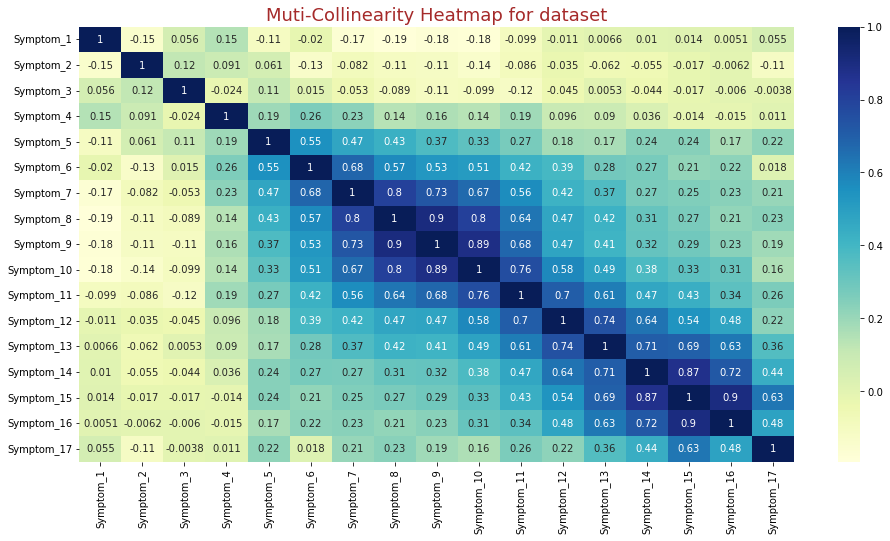

In [53]:
#Find out the correlation
cor = df1.corr()
#Draw the heatmap for checking the Multi-Collinearity of data
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.title('Muti-Collinearity Heatmap for dataset',fontsize=18,color='brown')
plt.show()

In [164]:
#This shows the collinarity between features
#Symptom_8 and Symptom_9 are highly positively correlated with each other
#Symptom_14 and Symptom_15 are highly positively correlated with each other
#Symptom_8 is also highly positively correlated with Symptom_7 and Symptom_10
#Symptom_9 is also highly positively correlated with Symptom_8 and Symptom_10
#Symptom_15 and Symptom_16 are highly positively correlated with each other
#Symptom_15 is also highly positively correlated with Symptom_14 and Symptom_16

<Figure size 1152x576 with 0 Axes>

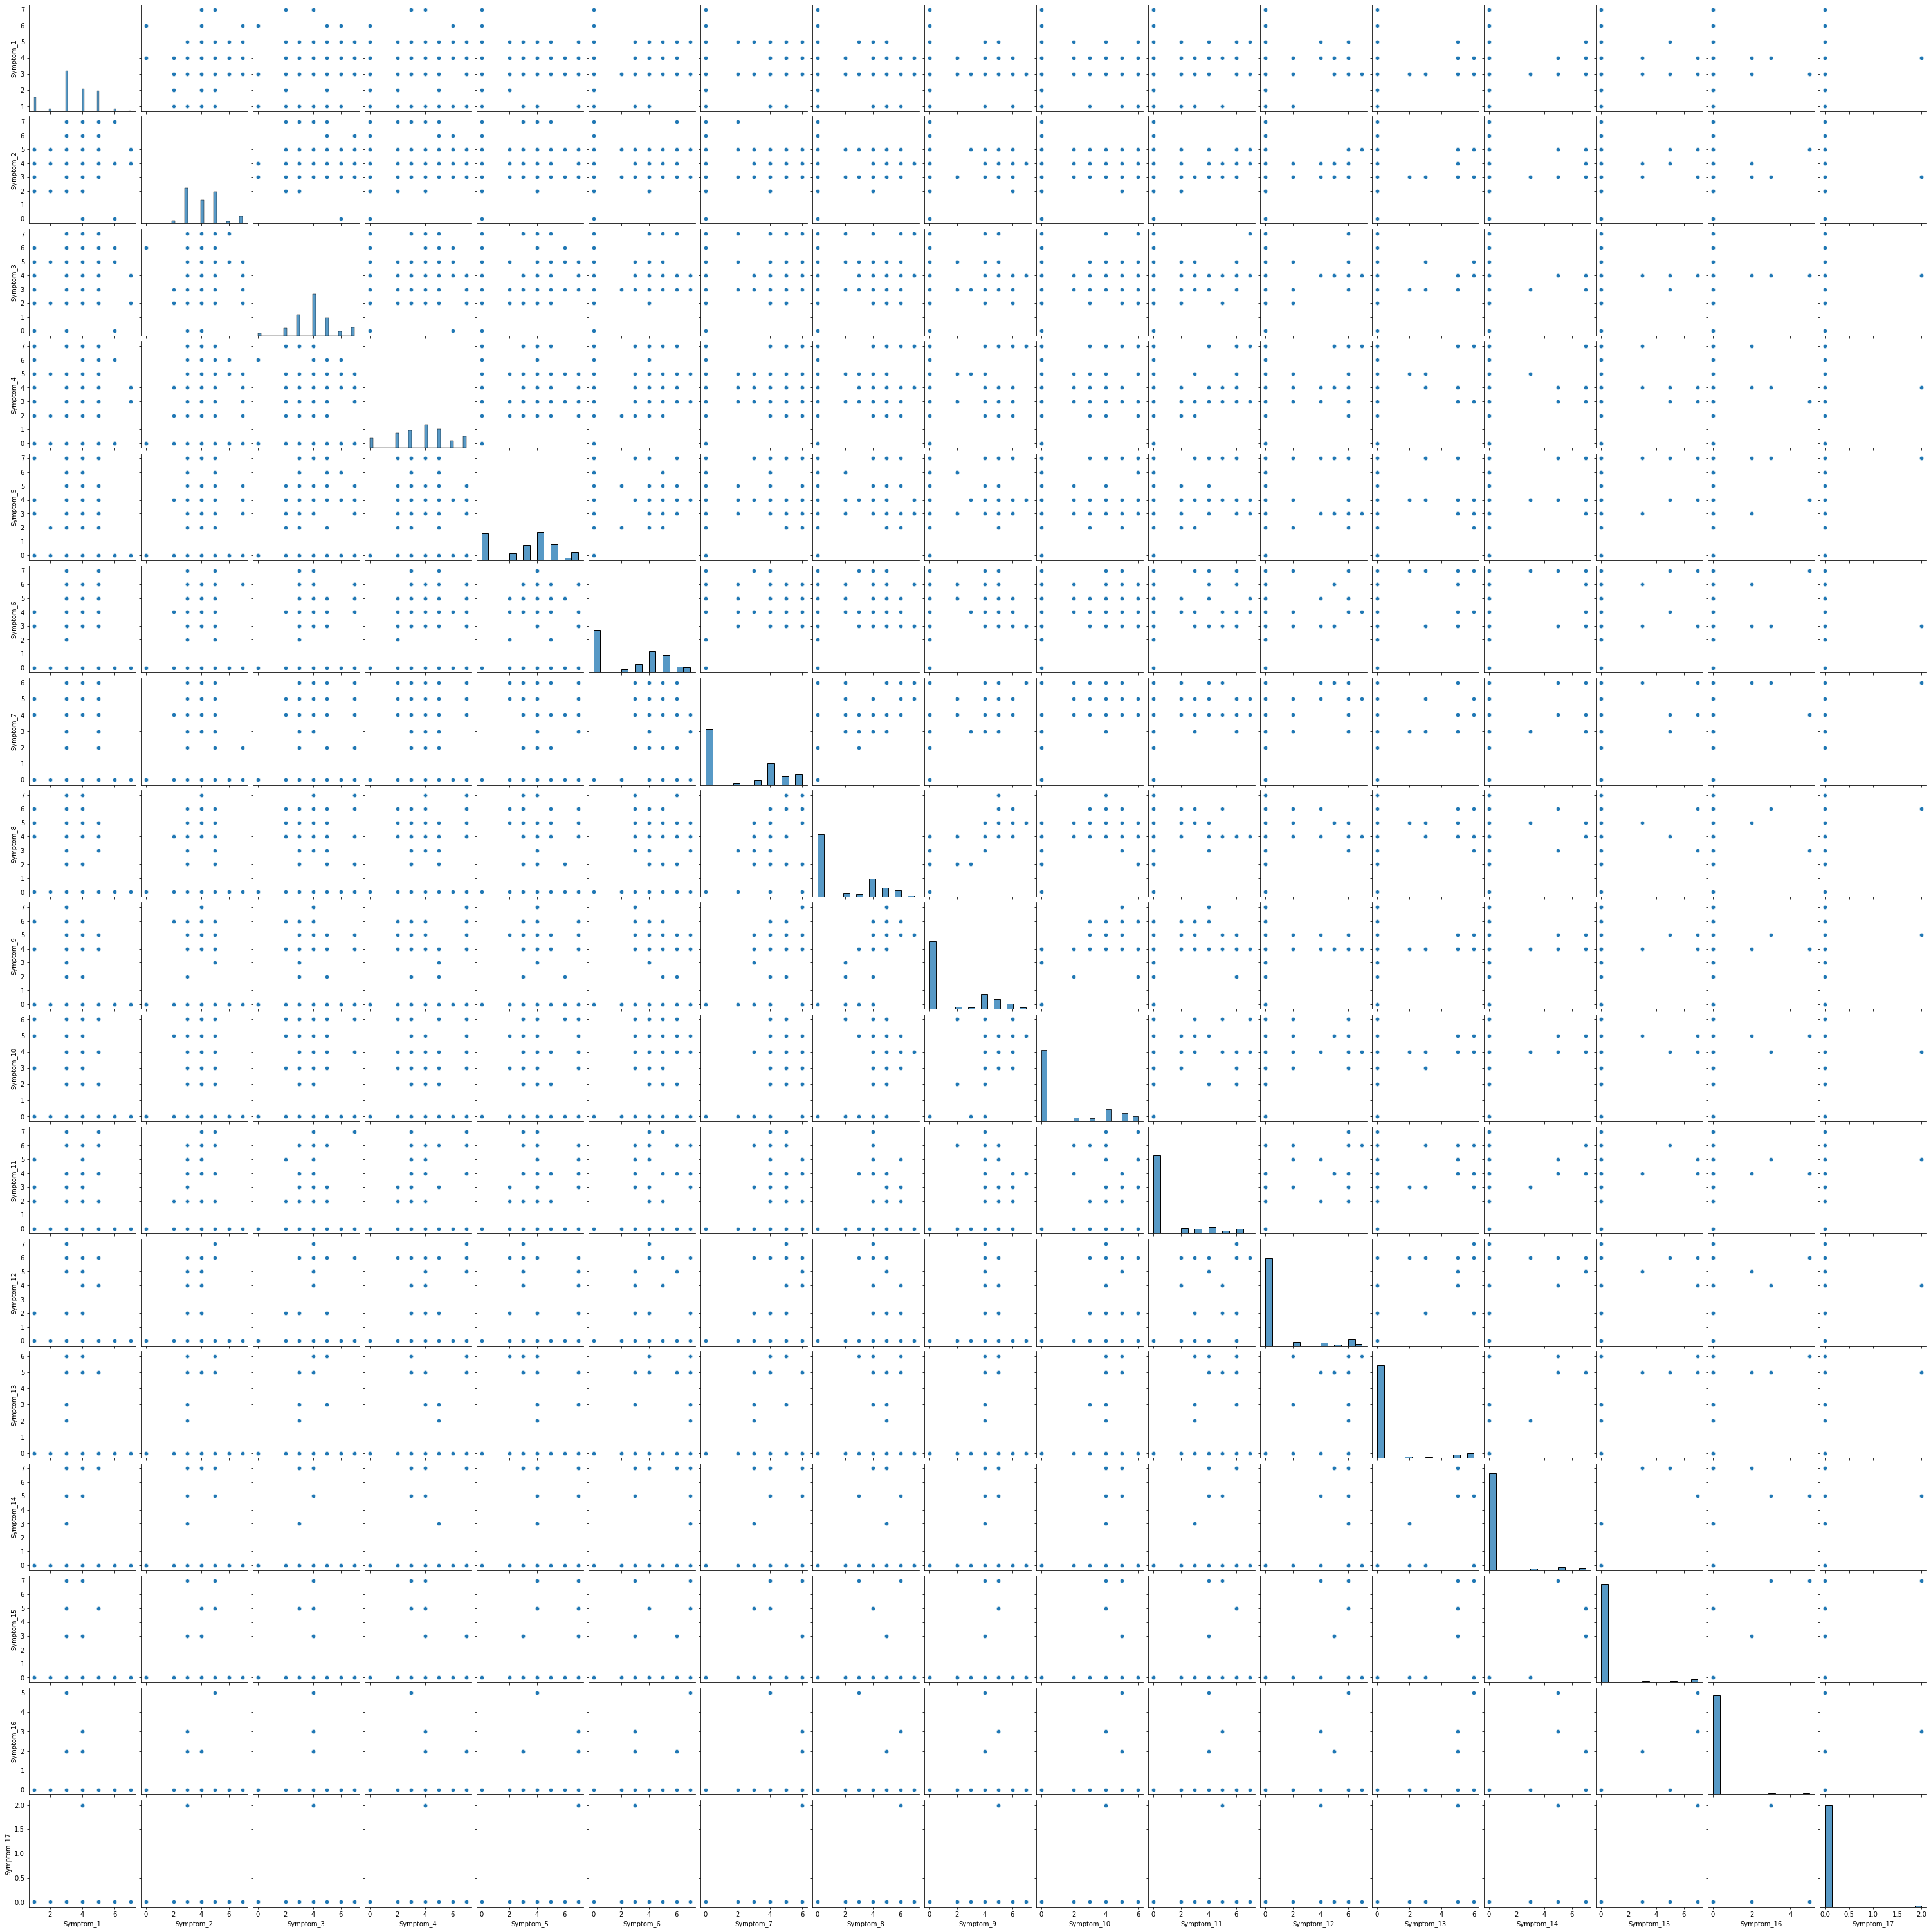

In [56]:
#To plot multiple pairwise bivariate distributions in a dataset
#diagonal plots are the univariate plots
plt.figure(figsize=(16,8))
sns.pairplot(df1)

In [116]:
df1.columns

Index(['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
       'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
       'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
       'Symptom_16', 'Symptom_17', 'Disease'],
      dtype='object')

In [117]:
final_data.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17', 'Description', 'Precaution_1',
       'Precaution_2', 'Precaution_3', 'Precaution_4', 'Type of Doctors',
       'Link ', 'Totalweight'],
      dtype='object')

In [118]:
#Merged data2 and data3 based on disease
output=pd.merge(data2,data3,on='Disease')
output

Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                 Diabetes   
13                                 Impetigo   
14                             Hypertension   
15                      Peptic ulcer diseae   
16             Dimorphic hemorrhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cervical spondylosis   
20                          Hyperthyroidism   
21                  Urinary tract infection   
22                           Varicose veins   
23                                     AIDS   
24             Paralysis (brain hemorrhage)   
25                                  Typhoid   
26                              Hepatitis B   
27                         Fungal infection   
28                              Hepatitis C   
29                                 Migraine   
30                         Bronchial Asthma   
31                      Alcoholic hepatitis   
32                                 Jaundice   
33                              Hepatitis E   
34                                   Dengue   
35                              Hepatitis D   
36                             Heart attack   
37                                Pneumonia   
38                                Arthritis   
39                          Gastroenteritis   
40                             Tuberculosis   

                                          Description  \
0   An adverse drug reaction (ADR) is an injury ca...   
1   An infectious disease caused by protozoan para...   
2   An allergy is an immune system response to a f...   
3   Hypothyroidism, also called underactive thyroi...   
4   Psoriasis is a common skin disorder that forms...   
5   Gastroesophageal reflux disease, or GERD, is a...   
6   Chronic cholestatic diseases, whether occurrin...   
7   Hepatitis A is a highly contagious liver infec...   
8   Osteoarthritis is the most common form of arth...   
9   Benign paroxysmal positional vertigo (BPPV) is...   
10   Hypoglycemia is a condition in which your blo...   
11  Acne vulgaris is the formation of comedones, p...   
12  Diabetes is a disease that occurs when your bl...   
13  Impetigo (im-puh-TIE-go) is a common and highl...   
14  Hypertension (HTN or HT), also known as high b...   
15  Peptic ulcer disease (PUD) is a break in the i...   
16  Hemorrhoids, also spelled haemorrhoids, are va...   
17  The common cold is a viral infection of your n...   
18  Chickenpox is a highly contagious disease caus...   
19  Cervical spondylosis is a general term for age...   
20  Hyperthyroidism (overactive thyroid) occurs wh...   
21  Urinary tract infection: An infection of the k...   
22  A vein that has enlarged and twisted, often ap...   
23  Acquired immunodeficiency syndrome (AIDS) is a...   
24  Intracerebral hemorrhage (ICH) is when blood s...   
25  An acute illness characterized by fever caused...   
26  Hepatitis B is an infection of your liver. It ...   
27  In humans, fungal infections occur when an inv...   
28  Inflammation of the liver due to the hepatitis...   
29  A migraine can cause severe throbbing pain or ...   
30  Bronchial asthma is a medical condition which ...   
31  Alcoholic hepatitis is a diseased, inflammator...   
32  Yellow staining of the skin and sclerae (the w...   
33  A rare form of liver inflammation caused by in...   
34  an acute infectious disease caused by a flaviv...   
35  Hepat

In [119]:
#Merged output and data4 based on disease
output1=pd.merge(output,data4,on='Disease')
output1

Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                 Diabetes   
13                                 Impetigo   
14                             Hypertension   
15                      Peptic ulcer diseae   
16             Dimorphic hemorrhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cervical spondylosis   
20                          Hyperthyroidism   
21                  Urinary tract infection   
22                           Varicose veins   
23                                     AIDS   
24             Paralysis (brain hemorrhage)   
25                                  Typhoid   
26                              Hepatitis B   
27                         Fungal infection   
28                              Hepatitis C   
29                                 Migraine   
30                         Bronchial Asthma   
31                      Alcoholic hepatitis   
32                                 Jaundice   
33                              Hepatitis E   
34                                   Dengue   
35                              Hepatitis D   
36                             Heart attack   
37                                Pneumonia   
38                                Arthritis   
39                          Gastroenteritis   
40                             Tuberculosis   

                                          Description  \
0   An adverse drug reaction (ADR) is an injury ca...   
1   An infectious disease caused by protozoan para...   
2   An allergy is an immune system response to a f...   
3   Hypothyroidism, also called underactive thyroi...   
4   Psoriasis is a common skin disorder that forms...   
5   Gastroesophageal reflux disease, or GERD, is a...   
6   Chronic cholestatic diseases, whether occurrin...   
7   Hepatitis A is a highly contagious liver infec...   
8   Osteoarthritis is the most common form of arth...   
9   Benign paroxysmal positional vertigo (BPPV) is...   
10   Hypoglycemia is a condition in which your blo...   
11  Acne vulgaris is the formation of comedones, p...   
12  Diabetes is a disease that occurs when your bl...   
13  Impetigo (im-puh-TIE-go) is a common and highl...   
14  Hypertension (HTN or HT), also known as high b...   
15  Peptic ulcer disease (PUD) is a break in the i...   
16  Hemorrhoids, also spelled haemorrhoids, are va...   
17  The common cold is a viral infection of your n...   
18  Chickenpox is a highly contagious disease caus...   
19  Cervical spondylosis is a general term for age...   
20  Hyperthyroidism (overactive thyroid) occurs wh...   
21  Urinary tract infection: An infection of the k...   
22  A vein that has enlarged and twisted, often ap...   
23  Acquired immunodeficiency syndrome (AIDS) is a...   
24  Intracerebral hemorrhage (ICH) is when blood s...   
25  An acute illness characterized by fever caused...   
26  Hepatitis B is an infection of your liver. It ...   
27  In humans, fungal infections occur when an inv...   
28  Inflammation of the liver due to the hepatitis...   
29  A migraine can cause severe throbbing pain or ...   
30  Bronchial asthma is a medical condition which ...   
31  Alcoholic hepatitis is a diseased, inflammator...   
32  Yellow staining of the skin and sclerae (the w...   
33  A rare form of liver inflammation caused by in...   
34  an acute infectious disease caused by a flaviv...   
35  Hepat

In [120]:
#Find out the maximum weight of each disease 
Weight=final_data.groupby('Disease')['Totalweight'].max()

In [121]:
Weight

Disease
(vertigo) Paroymsal  Positional Vertigo    27
AIDS                                       21
Acne                                        9
Alcoholic hepatitis                        34
Allergy                                    16
Arthritis                                  18
Bronchial Asthma                           28
Cervical spondylosis                       23
Chicken pox                                44
Chronic cholestasis                        26
Common Cold                                77
Dengue                                     55
Diabetes                                   41
Dimorphic hemorrhoids(piles)               26
Drug Reaction                              15
Fungal infection                            8
GERD                                       28
Gastroenteritis                            18
Heart attack                               19
Hepatitis B                                43
Hepatitis C                                25
Hepatitis D               

In [122]:
#Merged output1 with the weights based on disease
output2=pd.merge(output1,Weight,on='Disease')

In [123]:
output2

Disease  \
0                             Drug Reaction   
1                                   Malaria   
2                                   Allergy   
3                            Hypothyroidism   
4                                 Psoriasis   
5                                      GERD   
6                       Chronic cholestasis   
7                               hepatitis A   
8                           Osteoarthristis   
9   (vertigo) Paroymsal  Positional Vertigo   
10                             Hypoglycemia   
11                                     Acne   
12                                 Diabetes   
13                                 Impetigo   
14                             Hypertension   
15                      Peptic ulcer diseae   
16             Dimorphic hemorrhoids(piles)   
17                              Common Cold   
18                              Chicken pox   
19                     Cervical spondylosis   
20                          Hyperthyroidism   
21                  Urinary tract infection   
22                           Varicose veins   
23                                     AIDS   
24             Paralysis (brain hemorrhage)   
25                                  Typhoid   
26                              Hepatitis B   
27                         Fungal infection   
28                              Hepatitis C   
29                                 Migraine   
30                         Bronchial Asthma   
31                      Alcoholic hepatitis   
32                                 Jaundice   
33                              Hepatitis E   
34                                   Dengue   
35                              Hepatitis D   
36                             Heart attack   
37                                Pneumonia   
38                                Arthritis   
39                          Gastroenteritis   
40                             Tuberculosis   

                                          Description  \
0   An adverse drug reaction (ADR) is an injury ca...   
1   An infectious disease caused by protozoan para...   
2   An allergy is an immune system response to a f...   
3   Hypothyroidism, also called underactive thyroi...   
4   Psoriasis is a common skin disorder that forms...   
5   Gastroesophageal reflux disease, or GERD, is a...   
6   Chronic cholestatic diseases, whether occurrin...   
7   Hepatitis A is a highly contagious liver infec...   
8   Osteoarthritis is the most common form of arth...   
9   Benign paroxysmal positional vertigo (BPPV) is...   
10   Hypoglycemia is a condition in which your blo...   
11  Acne vulgaris is the formation of comedones, p...   
12  Diabetes is a disease that occurs when your bl...   
13  Impetigo (im-puh-TIE-go) is a common and highl...   
14  Hypertension (HTN or HT), also known as high b...   
15  Peptic ulcer disease (PUD) is a break in the i...   
16  Hemorrhoids, also spelled haemorrhoids, are va...   
17  The common cold is a viral infection of your n...   
18  Chickenpox is a highly contagious disease caus...   
19  Cervical spondylosis is a general term for age...   
20  Hyperthyroidism (overactive thyroid) occurs wh...   
21  Urinary tract infection: An infection of the k...   
22  A vein that has enlarged and twisted, often ap...   
23  Acquired immunodeficiency syndrome (AIDS) is a...   
24  Intracerebral hemorrhage (ICH) is when blood s...   
25  An acute illness characterized by fever caused...   
26  Hepatitis B is an infection of your liver. It ...   
27  In humans, fungal infections occur when an inv...   
28  Inflammation of the liver due to the hepatitis...   
29  A migraine can cause severe throbbing pain or ...   
30  Bronchial asthma is a medical condition which ...   
31  Alcoholic hepatitis is a diseased, inflammator...   
32  Yellow staining of the skin and sclerae (the w...   
33  A rare form of liver inflammation caused by in...   
34  an acute infectious disease caused by a flaviv...   
35  Hepat

In [124]:
output2.isna().sum()

Disease            0
Description        0
Precaution_1       0
Precaution_2       0
Precaution_3       1
Precaution_4       1
Type of Doctors    0
Link               0
Totalweight        0
dtype: int64

In [125]:
output2['Precaution_3']=output2['Precaution_3'].fillna('Wear loose-fitting, cotton clothes')

In [126]:
output2['Precaution_4']=output2['Precaution_4'].fillna('Begin CPR if the person is unconscious')

In [127]:
output2.isna().sum()

Disease            0
Description        0
Precaution_1       0
Precaution_2       0
Precaution_3       0
Precaution_4       0
Type of Doctors    0
Link               0
Totalweight        0
dtype: int64

In [128]:
#Convert final dataset to csv file
output2.to_csv('output.csv',index=False)

In [129]:
#split the columns as features and target
x=df1[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5','Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10','Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15','Symptom_16', 'Symptom_17']]
y=df1['Disease']

In [130]:
#split the data as train and test data(20% data reserved for testing purpose)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42,stratify=y)

# Multinomial logistic Regression

In [131]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('The Accurcy Score of logistic Regression is=',accuracy_score(y_pred,y_test))

The Accurcy Score of logistic Regression is= 0.8983739837398373


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
#Stratified K-Fold accuracy
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(lr, x, y, cv = sk_folds)
print("Average CV Score: ", scores.mean())

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Average CV Score:  0.9054878048780488


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      0.875     0.875     0.875        24
                                   AIDS      0.750     0.875     0.808        24
                                   Acne      1.000     1.000     1.000        24
                    Alcoholic hepatitis      1.000     0.750     0.857        24
                                Allergy      0.645     0.833     0.727        24
                              Arthritis      1.000     0.875     0.933        24
                       Bronchial Asthma      0.667     0.417     0.513        24
                   Cervical spondylosis      0.600     0.625     0.612        24
                            Chicken pox      1.000     1.000     1.000        24
                    Chronic cholestasis      0.880     0.917     0.898        24
                            Common Cold      1.000     1.000     1.000        24
                           

# KNeighborsClassifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier
lst_acc=[]
for i in range(2,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    lst_acc.append(acc)

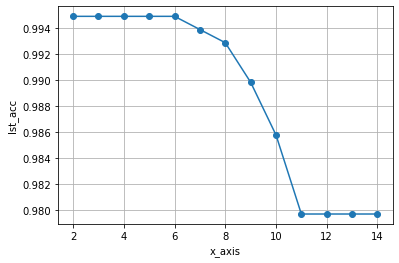

In [135]:
x_axis=range(2,15)
plt.plot(x_axis,lst_acc,'o-')
plt.xlabel('x_axis')
plt.ylabel('lst_acc')
plt.grid()

In [136]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print('The Accurcy Score of KNeighborsClassifier is=',accuracy_score(y_test,y_pred))

The Accurcy Score of KNeighborsClassifier is= 0.9949186991869918


In [137]:
#Stratified K-Fold accuracy
sk_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(knn, x, y, cv = sk_folds)
print("Average CV Score: ", scores.mean())

Average CV Score:  0.9951219512195122


In [138]:

print(metrics.classification_report(y_test, y_pred, digits=3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000        24
                                   AIDS      1.000     1.000     1.000        24
                                   Acne      1.000     1.000     1.000        24
                    Alcoholic hepatitis      1.000     1.000     1.000        24
                                Allergy      1.000     0.917     0.957        24
                              Arthritis      1.000     1.000     1.000        24
                       Bronchial Asthma      1.000     1.000     1.000        24
                   Cervical spondylosis      0.960     1.000     0.980        24
                            Chicken pox      1.000     1.000     1.000        24
                    Chronic cholestasis      1.000     1.000     1.000        24
                            Common Cold      1.000     1.000     1.000        24
                           

# Support Vector Classifier

In [137]:
#SVC with linear kernel
clf_svm=SVC(kernel='linear')
clf_svm.fit(x_train,y_train)
y_svm_predict=clf_svm.predict(x_test)
print('The Accurcy Score of SVC with linear kernel is=',accuracy_score(y_svm_predict,y_test))

The Accurcy Score of SVC with linear kernel is= 0.975609756097561


In [138]:
scores = cross_val_score(clf_svm, x, y, cv = sk_folds)
print("Average CV Score: ", scores.mean())

Average CV Score:  0.9841463414634146


In [139]:
print(metrics.classification_report(y_test,y_svm_predict, digits=3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      0.917     0.917     0.917        24
                                   AIDS      1.000     1.000     1.000        24
                                   Acne      1.000     1.000     1.000        24
                    Alcoholic hepatitis      1.000     1.000     1.000        24
                                Allergy      0.889     1.000     0.941        24
                              Arthritis      1.000     1.000     1.000        24
                       Bronchial Asthma      0.913     0.875     0.894        24
                   Cervical spondylosis      1.000     0.917     0.957        24
                            Chicken pox      1.000     1.000     1.000        24
                    Chronic cholestasis      1.000     0.917     0.957        24
                            Common Cold      1.000     1.000     1.000        24
                           

In [140]:
#SVC with rbf kernel
clf_svm1=SVC(kernel='rbf')
clf_svm1.fit(x_train,y_train)
y_svm_predict_rbf=clf_svm1.predict(x_test)
print('The Accurcy Score of SVC with rbf kernel is=',accuracy_score(y_svm_predict_rbf,y_pred))

The Accurcy Score of SVC with rbf kernel is= 0.926829268292683


In [141]:
scores = cross_val_score(clf_svm1, x, y, cv = sk_folds)
print("Average CV Score: ", scores.mean())

Average CV Score:  0.9345528455284553


In [142]:
print(metrics.classification_report(y_test,y_svm_predict_rbf, digits=3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      0.913     0.875     0.894        24
                                   AIDS      0.960     1.000     0.980        24
                                   Acne      1.000     1.000     1.000        24
                    Alcoholic hepatitis      1.000     0.792     0.884        24
                                Allergy      0.833     0.833     0.833        24
                              Arthritis      0.880     0.917     0.898        24
                       Bronchial Asthma      1.000     0.417     0.588        24
                   Cervical spondylosis      0.800     0.833     0.816        24
                            Chicken pox      1.000     1.000     1.000        24
                    Chronic cholestasis      0.786     0.917     0.846        24
                            Common Cold      1.000     1.000     1.000        24
                           

# DecisionTreeClassifier

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('The Accurcy Score of DecisionTreeClassifier is=',accuracy_score(y_test,y_pred))

The Accurcy Score of DecisionTreeClassifier is= 0.9939024390243902


In [144]:
scores = cross_val_score(dt, x, y, cv = sk_folds)
print("Average CV Score: ", scores.mean())

Average CV Score:  0.9951219512195122


In [146]:
print(metrics.classification_report(y_test,y_pred, digits=3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000        24
                                   AIDS      1.000     1.000     1.000        24
                                   Acne      1.000     1.000     1.000        24
                    Alcoholic hepatitis      1.000     1.000     1.000        24
                                Allergy      0.889     1.000     0.941        24
                              Arthritis      1.000     1.000     1.000        24
                       Bronchial Asthma      1.000     1.000     1.000        24
                   Cervical spondylosis      1.000     0.917     0.957        24
                            Chicken pox      1.000     1.000     1.000        24
                    Chronic cholestasis      1.000     1.000     1.000        24
                            Common Cold      1.000     1.000     1.000        24
                           

# RandomForestClassifier 

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('The Accurcy Score of RandomForestClassifier is=',accuracy_score(y_test,y_pred))

The Accurcy Score of RandomForestClassifier is= 0.9939024390243902


In [148]:
scores = cross_val_score(rf, x, y, cv = sk_folds)
print("Average CV Score: ", scores.mean())

Average CV Score:  0.9951219512195122


In [149]:
print(metrics.classification_report(y_test, y_pred, digits=3))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo      1.000     1.000     1.000        24
                                   AIDS      1.000     1.000     1.000        24
                                   Acne      1.000     1.000     1.000        24
                    Alcoholic hepatitis      1.000     1.000     1.000        24
                                Allergy      0.889     1.000     0.941        24
                              Arthritis      1.000     1.000     1.000        24
                       Bronchial Asthma      1.000     1.000     1.000        24
                   Cervical spondylosis      1.000     0.917     0.957        24
                            Chicken pox      1.000     1.000     1.000        24
                    Chronic cholestasis      1.000     1.000     1.000        24
                            Common Cold      1.000     1.000     1.000        24
                           

In [106]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[24,  0,  0, ...,  0,  0,  0],
       [ 0, 24,  0, ...,  0,  0,  0],
       [ 0,  0, 24, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ...,  0, 24,  0],
       [ 0,  0,  0, ...,  0,  0, 24]], dtype=int64)

In [114]:
conf_matrix.shape

(41, 41)

In [60]:
classifier=pd.read_csv("D:\\project\\classifier.csv")

In [61]:
classifier

Classifier  Accuracy  Stratified K-Fold accuracy  \
0  Multinomial  Logistic Regression     89.83                       90.54   
1              KNeighborsClassifier     99.49                       99.51   
2            SVC with linear kernel     97.56                       98.41   
3               SVC with rbf kernel     92.68                       93.45   
4            DecisionTreeClassifier     99.39                       99.51   
5            RandomForestClassifier     99.39                       99.51   

   Precision  Recall  F1-Score  
0       90.4    89.8      89.8  
1       99.5    99.5      99.5  
2       97.6    97.6      97.6  
3       93.7    92.8      92.6  
4       99.5    99.4      99.4  
5       99.5    99.4      99.4

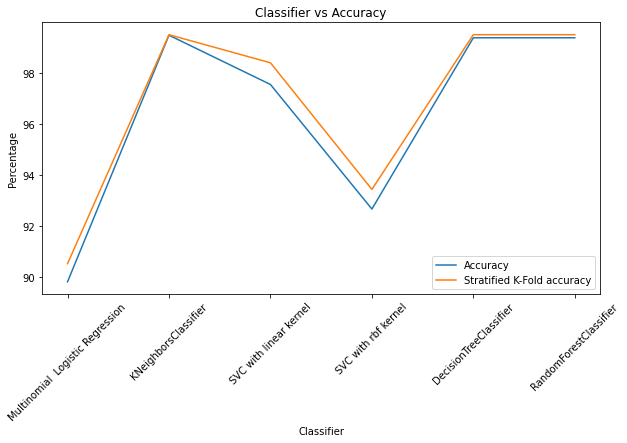

In [64]:
classifier.plot(x="Classifier", y=["Accuracy","Stratified K-Fold accuracy"])
plt.xticks(rotation=45)
plt.title("Classifier vs Accuracy")
plt.ylabel("Percentage")
plt.gcf().set_size_inches((10,5))

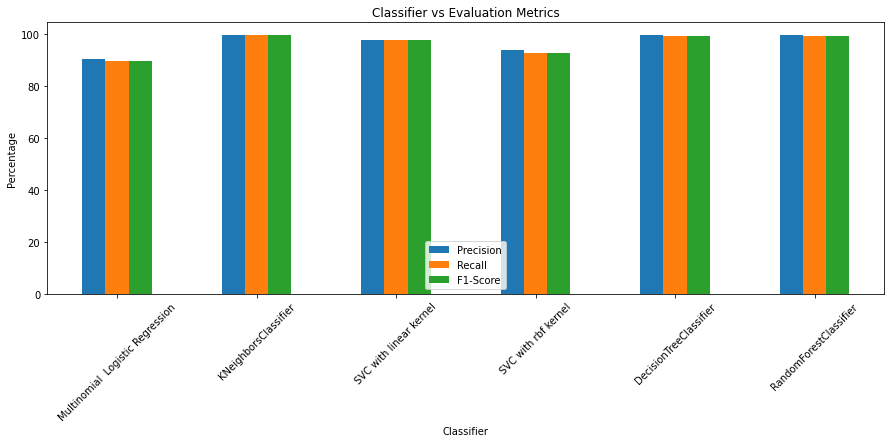

In [63]:
classifier.plot(x="Classifier", y=["Precision", "Recall","F1-Score"], kind="bar")
plt.xticks(rotation=45)
plt.title("Classifier vs Evaluation Metrics")
plt.ylabel("Percentage")
plt.gcf().set_size_inches((15,5))